In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# CREATE THE DATASET READY TO USE

In this section, we considered the three dataset about accidents in 2022, we clean them and finally we merge them. The purpose is creating the final data ready to use.

Since the three dataset are very large, we did not used a way to fill missing values, but we simply disregarded records with missing values.

### MODEL CASUALITY

In [2]:
cas = pd.read_csv('CASUALTY_22.csv')

# make the casualty being recorded only when the damaged one is the driver
cas.rename(columns={'age_of_casualty': 'age_of_driver'}, inplace=True)
cas.rename(columns={'sex_of_casualty': 'sex_of_driver'}, inplace=True)

Renaming the age_of_casuality and sex_of_casuality will be useful later on when merging the dataset. 

More in particular, in this whay we **merge the records in a way to record the accidents for drivers** as an accident may regard also other persons not specifically in the car with the driver or the driver himself

In [3]:
cas

,accident_reference,vehicle_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,bus_or_coach_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile
0,10352073,2,1,1,17,4,3,0,3,1,1
1,10352573,1,1,2,42,7,3,0,9,1,5
2,10352575,1,1,1,20,4,3,0,9,1,8
3,10352578,1,1,1,46,8,3,0,9,1,3
4,10352578,1,2,1,45,7,3,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...
135475,991311627,1,3,2,69,10,2,0,0,-1,-1
135476,991312498,1,1,1,36,7,2,0,19,3,6
135477,991315177,1,3,1,21,5,3,0,0,-1,-1
135478,991321308,1,3,2,28,6,2,0,0,-1,-1


In [4]:
cas['bus_or_coach_passenger'] = np.where(cas['bus_or_coach_passenger'] == 0, 0, np.nan)
cas['sex_of_driver'].replace(9, np.nan, inplace=True)
cas.dropna(inplace=True)
cas.drop(columns=['bus_or_coach_passenger'], inplace = True)
cas.shape

(133554, 10)

In [5]:
cas.replace(-1, np.nan, inplace=True)
cas.dropna(inplace=True)
cas.shape

(117734, 10)

As anticipade above, even by erasing missing values (sex_of_driver = 9 is the code for missing values) we end up with a very large dataset

### MODEL VEHICLE

In [6]:
ve = pd.read_csv('VEHICLE_22.csv')
ve.drop(columns=['vehicle_reference'], inplace = True)

In [7]:
ve

,accident_reference,vehicle_type,vehicle_manoeuvre,junction_location,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,10352073,19,9,1,2,1,48,8,1461,2,4,RENAULT KANGOO,7,1
1,10352073,3,18,1,2,1,17,4,125,1,1,HONDA FSH125,1,1
2,10352573,9,18,6,6,2,42,7,-1,-1,-1,-1,5,1
3,10352573,9,13,6,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,10352575,9,18,2,6,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193540,991312498,19,18,0,5,1,43,7,1968,2,0,VOLKSWAGEN CRAFTER,6,3
193541,991312498,9,2,0,5,1,62,9,1229,1,12,VAUXHALL CORSA,6,3
193542,991315177,9,5,2,6,1,61,9,1497,8,10,TOYOTA YARIS,3,1
193543,991321308,9,18,1,5,1,77,11,1794,1,17,TOYOTA AVENSIS,10,1


In [8]:
# Replace '-1' with np.nan
ve['generic_make_model'] = ve['generic_make_model'].replace('-1', np.nan)

# Drop the rows where 'generic_make_model' is np.nan
ve.dropna(subset=['generic_make_model'], inplace=True)

# Check the shape
print(ve.shape)

(146536, 14)


In [9]:
ve.replace(-1, np.nan, inplace=True)
ve.dropna(inplace=True)
ve.shape

(116376, 14)

### MODULE COLLISIONS

In [10]:
col = pd.read_csv('COLLISIONS_22.csv')

In [11]:
col

,accident_reference,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit
0,10352073,3,2,1,4,30
1,10352573,3,2,1,7,50
2,10352575,3,2,1,7,30
3,10352578,3,2,2,7,30
4,10352580,3,4,3,7,50
...,...,...,...,...,...,...
105999,991311627,2,1,1,7,30
106000,991312498,2,3,1,7,60
106001,991315177,3,1,1,6,30
106002,991321308,2,1,1,6,30


In [12]:
col.replace(-1, np.nan, inplace=True)
col.dropna(inplace=True)
col.shape

(106004, 6)

### CREATE THE DATASET

In [13]:
df = pd.merge(cas, ve, on=["accident_reference", "age_of_driver", 'sex_of_driver'], how="inner")
df.shape

(39480, 21)

The merging operation is applied on three levels,first the accident reference, second on the age of the driver and finally on the sex. These three levels ensure we select without any doibt the drivers involved in the accidents among the two datasets.

In [14]:
#df.to_excel('sample_1.xlsx', index=False)

In [15]:
df = pd.merge(df, col, on=["accident_reference"], how="inner")
df.shape

(39480, 26)

Collisions is a dataset where there are no references to the driver, but only to the reference ID, as such only that is considered. Overall this dataset contains almost no remarkable feature, though they can reveal some statistical pattern; for example number of vehicles involved may be higher for specific kind of drivers, making them riskier...

In [16]:
#df.to_excel('sample_2.xlsx', index=False)

The first dataset contains almost 40,000 records, so we proceed with creating the final sample by including between a bit more than 10,000 records since we are planning to drop those car models that do not appear that much. Hence, we use 0.26.

In [17]:
sample_fraction = 0.26
_, sample, _, _ = train_test_split(df, df['accident_reference'], test_size=sample_fraction)
sample.shape

(10265, 26)

In [18]:
#sample.to_excel('data.xlsx', index=False)

In [19]:
sample.columns

Index(['accident_reference', 'vehicle_reference', 'casualty_class',
       'sex_of_driver', 'age_of_driver', 'age_band_of_casualty',
       'casualty_severity', 'casualty_type', 'casualty_home_area_type',
       'casualty_imd_decile', 'vehicle_type', 'vehicle_manoeuvre',
       'junction_location', 'journey_purpose_of_driver', 'age_band_of_driver',
       'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle',
       'generic_make_model', 'driver_imd_decile', 'driver_home_area_type',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'speed_limit'],
      dtype='object')

In [20]:
sample

,accident_reference,vehicle_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile,...,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit
30346,471182264,2,1,1.0,20.0,4.0,3,9.0,1.0,7.0,...,1.0,15.0,VAUXHALL ASTRA,7.0,1.0,3,2,1,1,70
38659,63C054722,1,1,2.0,45.0,7.0,3,9.0,1.0,6.0,...,1.0,4.0,VOLKSWAGEN POLO,6.0,1.0,3,2,1,2,30
3847,141208603,2,1,1.0,29.0,6.0,3,9.0,1.0,2.0,...,1.0,19.0,FIAT PUNTO,2.0,1.0,3,2,2,6,70
28060,461197439,2,1,1.0,34.0,6.0,2,5.0,2.0,9.0,...,1.0,4.0,KAWASAKI EX,9.0,2.0,2,2,1,2,50
23690,440215055,2,1,1.0,44.0,7.0,1,9.0,1.0,9.0,...,1.0,11.0,PEUGEOT 207,9.0,1.0,1,2,3,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29295,461259383,2,1,1.0,42.0,7.0,3,9.0,2.0,6.0,...,2.0,14.0,SEAT LEON,6.0,2.0,3,2,1,2,30
8230,211183570,2,1,2.0,54.0,8.0,3,9.0,1.0,1.0,...,1.0,9.0,FORD FIESTA,1.0,1.0,3,3,1,2,30
25804,451188814,1,1,2.0,61.0,9.0,3,9.0,1.0,8.0,...,1.0,3.0,MERCEDES GLA CLASS,8.0,1.0,3,2,1,6,30
23226,440077325,1,1,2.0,18.0,4.0,3,9.0,1.0,10.0,...,1.0,2.0,HYUNDAI I10,10.0,1.0,3,1,1,5,70


### MAPPING

For the visualisation and statistics part, we need to give a meaning to the many records registered as numbers. To do this, we will use the file provided from the UK government to make the mapping correctly

In [21]:
# mapping

vehicle_reference_mapping = {
    1: "Pedal cycle",
    2: "Motorcycle 50cc and under",
    3: "Motorcycle 125cc and under",
    4: "Motorcycle over 125cc and up to 500cc",
    5: "Motorcycle over 500cc",
    8: "Taxi/Private hire car",
    9: "Car",
    10: "Minibus (8 - 16 passenger seats)",
    11: "Bus or coach (17 or more pass seats)",
    16: "Ridden horse",
    17: "Agricultural vehicle",
    18: "Tram",
    19: "Van / Goods 3.5 tonnes mgw or under",
    20: "Goods over 3.5t. and under 7.5t",
    21: "Goods 7.5 tonnes mgw and over",
    22: "Mobility scooter",
    23: "Electric motorcycle",
    90: "Other vehicle",
    97: "Motorcycle - unknown cc",
    98: "Goods vehicle - unknown weight",
    99: "Unknown vehicle type (self rep only)",
    103: "Motorcycle - Scooter (1979-1998)",
    104: "Motorcycle (1979-1998)",
    105: "Motorcycle - Combination (1979-1998)",
    106: "Motorcycle over 125cc (1999-2004)",
    108: "Taxi (excluding private hire cars) (1979-2004)",
    109: "Car (including private hire cars) (1979-2004)",
    110: "Minibus/Motor caravan (1979-1998)",
    113: "Goods over 3.5 tonnes (1979-1998)"
}

sample['vehicle_reference'] = sample['vehicle_reference'].map(vehicle_reference_mapping)



casualty_class_mapping = {
    1: 'Driver or rider',
    2: 'Passenger',
    3: 'Pedestrian'
}

sample['casualty_class'] = sample['casualty_class'].map(casualty_class_mapping)



sex_of_driver_mapping = {
    1: 'Male',
    2: 'Female',
    9: 'unknown (self reported)',
}

sample['sex_of_driver'] = sample['sex_of_driver'].map(sex_of_driver_mapping)



casualty_type_mapping = {
    0: 'Pedestrian',
    1: 'Cyclist',
    2: 'Motorcycle 50cc and under rider or passenger',
    3: 'Motorcycle 125cc and under rider or passenger',
    4: 'Motorcycle over 125cc and up to 500cc rider or passenger',
    5: 'Motorcycle over 500cc rider or passenger',
    8: 'Taxi/Private hire car occupant',
    9: 'Car occupant',
    10: 'Minibus (8 - 16 passenger seats) occupant',
    11: 'Bus or coach occupant (17 or more pass seats)',
    16: 'Horse rider',
    17: 'Agricultural vehicle occupant',
    18: 'Tram occupant',
    19: 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
    20: 'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
    21: 'Goods vehicle (7.5 tonnes mgw and over) occupant',
    22: 'Mobility scooter rider',
    23: 'Electric motorcycle rider or passenger',
    90: 'Other vehicle occupant',
    97: 'Motorcycle - unknown cc rider or passenger',
    98: 'Goods vehicle (unknown weight) occupant',
    99: 'Unknown vehicle type (self rep only)',
    103: 'Motorcycle - Scooter (1979-1998)',
    104: 'Motorcycle (1979-1998)',
    105: 'Motorcycle - Combination (1979-1998)',
    106: 'Motorcycle over 125cc (1999-2004)',
    108: 'Taxi (excluding private hire cars) (1979-2004)',
    109: 'Car (including private hire cars) (1979-2004)',
    110: 'Minibus/Motor caravan (1979-1998)',
    113: 'Goods over 3.5 tonnes (1979-1998)'
}

sample['casualty_type'] = sample['casualty_type'].map(casualty_type_mapping)




vehicle_manoeuvre_map = {
    1: 'Reversing',
    2: 'Parked',
    3: 'Waiting to go - held up',
    4: 'Slowing or stopping',
    5: 'Moving off',
    6: 'U-turn',
    7: 'Turning left',
    8: 'Waiting to turn left',
    9: 'Turning right',
    10: 'Waiting to turn right',
    11: 'Changing lane to left',
    12: 'Changing lane to right',
    13: 'Overtaking moving vehicle - offside',
    14: 'Overtaking static vehicle - offside',
    15: 'Overtaking - nearside',
    16: 'Going ahead left-hand bend',
    17: 'Going ahead right-hand bend',
    18: 'Going ahead other',
    99: 'unknown (self reported)'
}

sample['vehicle_manoeuvre'] = sample['vehicle_manoeuvre'].map(vehicle_manoeuvre_map)




casualty_home_area_type_mapping = {
    1: 'Urban area',
    2: 'Small town',
    3: 'Rural'
}

sample['casualty_home_area_type'] = sample['casualty_home_area_type'].map(casualty_home_area_type_mapping)



casualty_imd_decile_mapping = {
    1: 'Most deprived 10%',
    2: 'More deprived 10-20%',
    3: 'More deprived 20-30%',
    4: 'More deprived 30-40%',
    5: 'More deprived 40-50%',
    6: 'Less deprived 40-50%',
    7: 'Less deprived 30-40%',
    8: 'Less deprived 20-30%',
    9: 'Less deprived 10-20%',
    10: 'Least deprived 10%'
}

sample['casualty_imd_decile'] = sample['casualty_imd_decile'].map(casualty_imd_decile_mapping)



day_of_week_mapping = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

sample['day_of_week'] = sample['day_of_week'].map(day_of_week_mapping)



vehicle_type_mapping = {
    1: "Pedal cycle",
    2: "Motorcycle 50cc and under",
    3: "Motorcycle 125cc and under",
    4: "Motorcycle over 125cc and up to 500cc",
    5: "Motorcycle over 500cc",
    8: "Taxi/Private hire car",
    9: "Car",
    10: "Minibus (8 - 16 passenger seats)",
    11: "Bus or coach (17 or more pass seats)",
    16: "Ridden horse",
    17: "Agricultural vehicle",
    18: "Tram",
    19: "Van / Goods 3.5 tonnes mgw or under",
    20: "Goods over 3.5t. and under 7.5t",
    21: "Goods 7.5 tonnes mgw and over",
    22: "Mobility scooter",
    23: "Electric motorcycle",
    90: "Other vehicle",
    97: "Motorcycle - unknown cc",
    98: "Goods vehicle - unknown weight",
    99: "Unknown vehicle type (self rep only)",
    103: "Motorcycle - Scooter (1979-1998)",
    104: "Motorcycle (1979-1998)",
    105: "Motorcycle - Combination (1979-1998)",
    106: "Motorcycle over 125cc (1999-2004)",
    108: "Taxi (excluding private hire cars) (1979-2004)",
    109: "Car (including private hire cars) (1979-2004)",
    110: "Minibus/Motor caravan (1979-1998)",
    113: "Goods over 3.5 tonnes (1979-1998)"
}

sample['vehicle_type'] = sample['vehicle_type'].map(vehicle_type_mapping)



journey_purpose_map = {
    1: 'Journey as part of work',
    2: 'Commuting to/from work',
    3: 'Taking pupil to/from school',
    4: 'Pupil riding to/from school',
    5: 'Other',
    6: 'Not known',
    15: 'Other/Not known'
}

sample['journey_purpose_of_driver'] = sample['journey_purpose_of_driver'].map(journey_purpose_map)



propulsion_code_map = {
    1: 'Petrol',
    2: 'Heavy oil',
    3: 'Electric',
    4: 'Steam',
    5: 'Gas',
    6: 'Petrol/Gas (LPG)',
    7: 'Gas/Bi-fuel',
    8: 'Hybrid electric',
    9: 'Gas Diesel',
    10: 'New fuel technology',
    11: 'Fuel cells',
    12: 'Electric diesel'
}

sample['propulsion_code'] = sample['propulsion_code'].map(propulsion_code_map)



driver_home_area_type_map = {
    1: 'Urban area',
    2: 'Small town',
    3: 'Rural'
}

sample['driver_home_area_type'] = sample['driver_home_area_type'].map(driver_home_area_type_map)



driver_imd_decile_map = {
    1: 'Most deprived 10%',
    2: 'More deprived 10-20%',
    3: 'More deprived 20-30%',
    4: 'More deprived 30-40%',
    5: 'More deprived 40-50%',
    6: 'Less deprived 40-50%',
    7: 'Less deprived 30-40%',
    8: 'Less deprived 20-30%',
    9: 'Less deprived 10-20%',
    10: 'Least deprived 10%'
}

sample['driver_imd_decile'] = sample['driver_imd_decile'].map(driver_imd_decile_map)



junction_location_map = {
    0: 'Not at or within 20 metres of junction',
    1: 'Approaching junction or waiting/parked at junction approach',
    2: 'Cleared junction or waiting/parked at junction exit',
    3: 'Leaving roundabout',
    4: 'Entering roundabout',
    5: 'Leaving main road',
    6: 'Entering main road',
    7: 'Entering from slip road',
    8: 'Mid Junction - on roundabout or on main road',
    9: 'unknown (self reported)'
}

sample['junction_location'] = sample['junction_location'].map(junction_location_map)

accident_severity is not mapped because using numbers make statistics will be easier

In [22]:
sample

,accident_reference,vehicle_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile,...,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit
30346,471182264,Motorcycle 50cc and under,Driver or rider,Male,20.0,4.0,3,Car occupant,Urban area,Less deprived 30-40%,...,Petrol,15.0,VAUXHALL ASTRA,Less deprived 30-40%,Urban area,3,2,1,Sunday,70
38659,63C054722,Pedal cycle,Driver or rider,Female,45.0,7.0,3,Car occupant,Urban area,Less deprived 40-50%,...,Petrol,4.0,VOLKSWAGEN POLO,Less deprived 40-50%,Urban area,3,2,1,Monday,30
3847,141208603,Motorcycle 50cc and under,Driver or rider,Male,29.0,6.0,3,Car occupant,Urban area,More deprived 10-20%,...,Petrol,19.0,FIAT PUNTO,More deprived 10-20%,Urban area,3,2,2,Friday,70
28060,461197439,Motorcycle 50cc and under,Driver or rider,Male,34.0,6.0,2,Motorcycle over 500cc rider or passenger,Small town,Less deprived 10-20%,...,Petrol,4.0,KAWASAKI EX,Less deprived 10-20%,Small town,2,2,1,Monday,50
23690,440215055,Motorcycle 50cc and under,Driver or rider,Male,44.0,7.0,1,Car occupant,Urban area,Less deprived 10-20%,...,Petrol,11.0,PEUGEOT 207,Less deprived 10-20%,Urban area,1,2,3,Monday,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29295,461259383,Motorcycle 50cc and under,Driver or rider,Male,42.0,7.0,3,Car occupant,Small town,Less deprived 40-50%,...,Heavy oil,14.0,SEAT LEON,Less deprived 40-50%,Small town,3,2,1,Monday,30
8230,211183570,Motorcycle 50cc and under,Driver or rider,Female,54.0,8.0,3,Car occupant,Urban area,Most deprived 10%,...,Petrol,9.0,FORD FIESTA,Most deprived 10%,Urban area,3,3,1,Monday,30
25804,451188814,Pedal cycle,Driver or rider,Female,61.0,9.0,3,Car occupant,Urban area,Less deprived 20-30%,...,Petrol,3.0,MERCEDES GLA CLASS,Less deprived 20-30%,Urban area,3,2,1,Friday,30
23226,440077325,Pedal cycle,Driver or rider,Female,18.0,4.0,3,Car occupant,Urban area,Least deprived 10%,...,Petrol,2.0,HYUNDAI I10,Least deprived 10%,Urban area,3,1,1,Thursday,70


Final check for the missing values (the dataset is large enough we can afford just to drop missing values without need to using any inputting method)

In [23]:
sample.replace(-1, np.nan, inplace=True)
sample.dropna(inplace=True)
sample.shape

(10260, 26)

In [24]:
#sample.to_excel('data_f.xlsx', index=False)

Drop all the columns we do not need as they are repetition of the same column from different dataset or that we simply do not need it

In [25]:
sample.drop(columns=['vehicle_reference', 'casualty_class', 'casualty_home_area_type', 'vehicle_type', 'day_of_week', 'speed_limit', 'age_band_of_casualty', 'casualty_severity', 'casualty_imd_decile', 'casualty_type'], inplace = True)

In [26]:
sample.shape

(10260, 16)

In [2]:
# read the excel Dataset file
df=pd.read_excel("data_f_2.xlsx")
#df = sample.copy()
df.head() # Display the first five rows
#df.head()

,accident_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,casualty_type,casualty_imd_decile,vehicle_manoeuvre,junction_location,...,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit
0,361153686,Driver or rider,Male,44,7,3,Car occupant,More deprived 30-40%,Slowing or stopping,Mid Junction - on roundabout or on main road,...,Heavy oil,13,VOLKSWAGEN GOLF,More deprived 30-40%,Rural,2,3,2,Thursday,60
1,501188570,Driver or rider,Female,35,6,3,Car occupant,More deprived 40-50%,Turning left,Cleared junction or waiting/parked at junction...,...,Heavy oil,17,HYUNDAI TUCSON,More deprived 40-50%,Urban area,3,2,2,Thursday,30
2,501170079,Driver or rider,Female,20,4,3,Car occupant,More deprived 30-40%,Going ahead right-hand bend,Not at or within 20 metres of junction,...,Petrol,19,FORD FIESTA,More deprived 30-40%,Urban area,3,1,1,Saturday,60
3,351179483,Driver or rider,Male,28,6,3,Car occupant,More deprived 40-50%,Turning right,Leaving roundabout,...,Petrol,17,FORD FIESTA,More deprived 40-50%,Urban area,3,2,2,Friday,30
4,332201019,Driver or rider,Male,24,5,3,Car occupant,More deprived 40-50%,Turning right,Leaving main road,...,Heavy oil,5,AUDI A3,More deprived 40-50%,Urban area,3,2,3,Tuesday,70


In [3]:
df.shape

(9269, 23)

Before creating our predictive model, we must first split the data into training and testing data. We will use 30% of the dataset for testing and use 70% for training.

### CREATE FEATURES THAT ARE INTERESTING TO INVESTIGATE

Here we create a new variable, which is the model of the car. 

Since there are may car models that are recorded only 1, or a few time, we decide to drop them. They are around 500. In this way, we stick to the requirement of less than 10,000 observations and at the same time we have an acceptable minimum amount of brands upon which we hope to make a good statistical analysis.

In [4]:
df['generic_make_model'] = df['generic_make_model'].str.upper()
df['model'] = df['generic_make_model'].str.split().str[0]
df['model'].value_counts()

FORD          1167
VAUXHALL       836
VOLKSWAGEN     745
HONDA          606
BMW            516
              ... 
SSANGYONG        1
MUTT             1
HUSQVARNA        1
MASSEY           1
INFINITI         1
Name: model, Length: 80, dtype: int64

In [5]:
unique_value_counts = df['model'].value_counts()
unique_values = unique_value_counts[unique_value_counts > 100].count()
unique_values

22

In [6]:
df1 = df.copy()
value_counts = df1['model'].value_counts() # count how many times all the unique vehicle appears
cars_to_keep = value_counts[value_counts > 50].index.tolist() #create a list of cars to keep
filtered_df = df[df['model'].isin(cars_to_keep)]
filtered_df.shape

(8747, 24)

In [7]:
filtered_df.groupby('model').size()

model
AUDI           424
BMW            516
CITROEN        277
FIAT           215
FORD          1167
HONDA          606
HYUNDAI        184
JAGUAR          58
KAWASAKI        89
KIA            183
LAND           140
LEXMOTO         73
MAZDA           98
MERCEDES       415
MINI           168
NISSAN         320
PEUGEOT        403
RENAULT        282
SEAT           181
SKODA          208
SUZUKI         247
TOYOTA         449
TRIUMPH         68
VAUXHALL       836
VOLKSWAGEN     745
VOLVO          113
YAMAHA         282
dtype: int64

In [8]:
filtered_df

,accident_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,casualty_type,casualty_imd_decile,vehicle_manoeuvre,junction_location,...,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit,model
0,361153686,Driver or rider,Male,44,7,3,Car occupant,More deprived 30-40%,Slowing or stopping,Mid Junction - on roundabout or on main road,...,13,VOLKSWAGEN GOLF,More deprived 30-40%,Rural,2,3,2,Thursday,60,VOLKSWAGEN
1,501188570,Driver or rider,Female,35,6,3,Car occupant,More deprived 40-50%,Turning left,Cleared junction or waiting/parked at junction...,...,17,HYUNDAI TUCSON,More deprived 40-50%,Urban area,3,2,2,Thursday,30,HYUNDAI
2,501170079,Driver or rider,Female,20,4,3,Car occupant,More deprived 30-40%,Going ahead right-hand bend,Not at or within 20 metres of junction,...,19,FORD FIESTA,More deprived 30-40%,Urban area,3,1,1,Saturday,60,FORD
3,351179483,Driver or rider,Male,28,6,3,Car occupant,More deprived 40-50%,Turning right,Leaving roundabout,...,17,FORD FIESTA,More deprived 40-50%,Urban area,3,2,2,Friday,30,FORD
4,332201019,Driver or rider,Male,24,5,3,Car occupant,More deprived 40-50%,Turning right,Leaving main road,...,5,AUDI A3,More deprived 40-50%,Urban area,3,2,3,Tuesday,70,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9264,161134173,Driver or rider,Male,34,6,3,Car occupant,Least deprived 10%,Turning right,Leaving main road,...,1,PEUGEOT 108,Least deprived 10%,Rural,3,2,1,Wednesday,30,PEUGEOT
9265,361137717,Driver or rider,Male,70,10,2,Car occupant,Less deprived 40-50%,Going ahead other,Not at or within 20 metres of junction,...,17,NISSAN ALMERA,Less deprived 40-50%,Rural,2,4,3,Friday,50,NISSAN
9266,201200753,Driver or rider,Male,32,6,3,Car occupant,More deprived 10-20%,Turning right,Entering main road,...,3,FORD FOCUS,More deprived 10-20%,Urban area,2,2,3,Wednesday,20,FORD
9267,430003883,Driver or rider,Female,76,11,3,Car occupant,Least deprived 10%,Going ahead other,Approaching junction or waiting/parked at junc...,...,5,TOYOTA YARIS,Least deprived 10%,Urban area,3,2,1,Tuesday,30,TOYOTA


In [9]:
df = filtered_df.copy()

In [10]:
df.to_excel('data_f_2.xlsx', index=False)

In [11]:
df.describe() # this just describes the numberical columns

,age_of_driver,age_band_of_casualty,casualty_severity,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties,speed_limit
count,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000,8747.000000
mean,40.724934,6.909912,2.808506,6.909912,1516.966388,9.243855,2.737510,2.075797,1.699097,43.196525
std,17.512859,1.873760,0.426410,1.873760,886.004145,5.748789,0.486888,0.766521,1.075900,15.315215
min,13.000000,3.000000,1.000000,3.000000,49.000000,0.000000,1.000000,1.000000,1.000000,20.000000
25%,26.000000,6.000000,3.000000,6.000000,1198.000000,5.000000,3.000000,2.000000,1.000000,30.000000
50%,37.000000,7.000000,3.000000,7.000000,1497.000000,9.000000,3.000000,2.000000,1.000000,40.000000
75%,53.000000,8.000000,3.000000,8.000000,1956.000000,13.000000,3.000000,2.000000,2.000000,60.000000
max,96.000000,11.000000,3.000000,11.000000,15569.000000,49.000000,3.000000,10.000000,14.000000,70.000000


# **Descriptive Statistics and Exploratory Data Analysis:**
This section highlights and gives a thorough breakdown of the variables included within the dataframe. The descriptive statistics provides insights into the distribution of the data, which facilitates the process of selecting the appropriate predictive models and in preprocessing effectivley. Heavily skewed data may indicate the need for transformation or the selection of certain models that are robust.
New section
It is possible to identify any ouliers as these results could significantly affect the predictive model. Descriptive statistics helps to decide how to handle outliers, whether that means removing them, transforming them, or treating them specially in the modelling process.

Relevant features would be identified during this process, as features with low variance or high correlation with other features may not contribute much to the predictive model, and could therefore be removed.

To aid our decision making process and analysis, we will use Histograms, Bar Charts and Box Plots to illustrate and visualise the distribution of the dataset. Numeric values can be visualised through the use of Histograms and Box Plots, whilst categorical variables can be identified through the use of Bar Charts.

## Descriptive Statistics for the Dependant Variables

### Descriptive Statistics for 'accident severity'.

In [12]:
# read the excel Dataset file
df=pd.read_excel("data_f_2.xlsx")
#df = sample.copy()
df.head() # Display the first five rows
#df.head()

,accident_reference,casualty_class,sex_of_driver,age_of_driver,age_band_of_casualty,casualty_severity,casualty_type,casualty_imd_decile,vehicle_manoeuvre,junction_location,...,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,speed_limit
0,361153686,Driver or rider,Male,44,7,3,Car occupant,More deprived 30-40%,Slowing or stopping,Mid Junction - on roundabout or on main road,...,Heavy oil,13,VOLKSWAGEN GOLF,More deprived 30-40%,Rural,2,3,2,Thursday,60
1,501188570,Driver or rider,Female,35,6,3,Car occupant,More deprived 40-50%,Turning left,Cleared junction or waiting/parked at junction...,...,Heavy oil,17,HYUNDAI TUCSON,More deprived 40-50%,Urban area,3,2,2,Thursday,30
2,501170079,Driver or rider,Female,20,4,3,Car occupant,More deprived 30-40%,Going ahead right-hand bend,Not at or within 20 metres of junction,...,Petrol,19,FORD FIESTA,More deprived 30-40%,Urban area,3,1,1,Saturday,60
3,351179483,Driver or rider,Male,28,6,3,Car occupant,More deprived 40-50%,Turning right,Leaving roundabout,...,Petrol,17,FORD FIESTA,More deprived 40-50%,Urban area,3,2,2,Friday,30
4,332201019,Driver or rider,Male,24,5,3,Car occupant,More deprived 40-50%,Turning right,Leaving main road,...,Heavy oil,5,AUDI A3,More deprived 40-50%,Urban area,3,2,3,Tuesday,70


In [13]:
#dependent variable
pd.DataFrame(df['accident_severity'].describe())

,accident_severity
count,9269.000000
mean,2.733197
std,0.489994
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


As you can see from the table above, the mean average for the accident severity suggests a value of '2.73' and has a standard deviation of '0.49'. 

1 means fatal\
2 means serious\
3 means slight

In the dataset there are a few fatal accidents, and most of them are slight

Text(0.5, 1.0, 'Distribution of accident_severity')

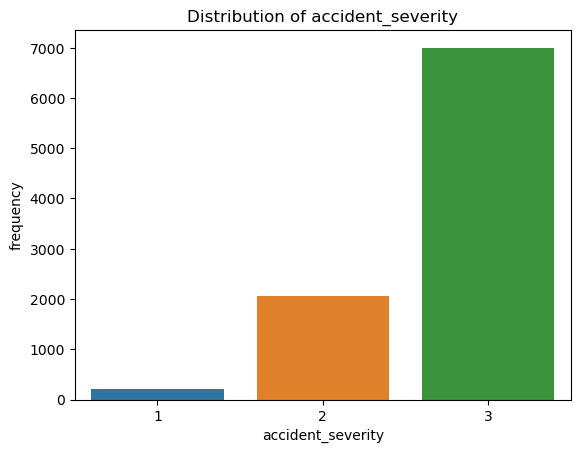

In [14]:
sns.countplot(x='accident_severity',data=df)
# add x/y labels
plt.xlabel("accident_severity")
plt.ylabel("frequency")
# add title
plt.title("Distribution of accident_severity")

In [15]:
pd.DataFrame(df.groupby('accident_severity').size())

,0
accident_severity,
1,206
2,2061
3,7002


This wariable is left skewed. We may need specific techniques for identifying the accident severity of 1 as there aren't enough records to train almost any model successfully

## **Descriptive Statistics for Independant Variables:**

### Descriptive Statistics for 'Sex of Driver'.

In [16]:
#independent variable
#sex_of_driver_C
pd.DataFrame(df['sex_of_driver'].describe())


,sex_of_driver
count,9269
unique,2
top,Male
freq,5667


We can use descriptive statistics to look at the gender of drivers and to visualise the frequency of accidents. It is clear to see that most of the accidents involved Male drivers.

Studies suggest male drivers impose a more risk-taking behaviour, further implying male drivers would tend to engage in riskier driving behaviours. This could include, speeding, aggressive driving and also driving whilst under the influence of alcohol.

Text(0.5, 1.0, 'sex_of_driver')

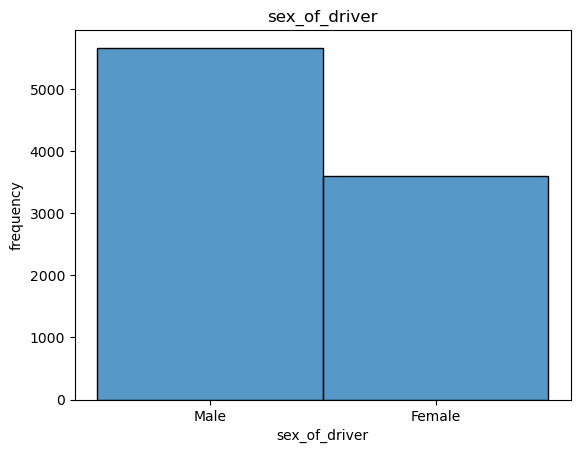

In [17]:
sns.histplot(df['sex_of_driver'])
# add x/y labels
plt.xlabel("sex_of_driver")
plt.ylabel("frequency")
# add title
plt.title("sex_of_driver")

### Descriptive Statistics for 'Age of Driver'

In [42]:
#independent variable
#age_of_driver
pd.DataFrame(df['age_of_driver'].describe())


,age_of_driver
count,9685.000000
mean,40.923490
std,17.674259
min,13.000000
25%,26.000000
50%,37.000000
75%,53.000000
max,99.000000


From the table above we can see that dataset ranges from the ages of 15 to 96. This describes the range of individuals involved in accidents. The table further suggests that the mean age was roughly '40' years old, with a standard deviation of roughly '17.57'.

The Box Plot illustrated below highlights the ditribution of the ages of individuals involved in accidents. We can see that the from a visual representation, most of the accidents occur for drivers between the ages of '26' and '53'. There are outliers, however, the occurance is very low and also, this was the case for drivers over the age of '90'.

It is clear to see that most accidents involve drivers who are roughly between  37 and 53.

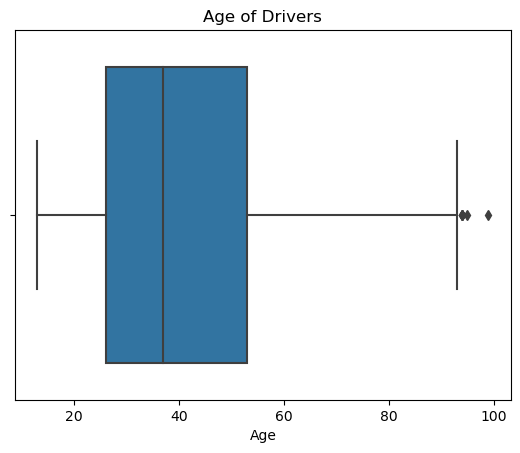

In [43]:
sns.boxplot(x='age_of_driver', data=df)
plt.title('Age of Drivers')
plt.xlabel('Age')
plt.show()

We can also see a Histogram which further illustrates the distribution of the frequency of accidents, relative to the age of the driver. The Histogram additionally suggests and highlights the majority of accidents occuring for drivesr between the age of 26 and 53. The occurance of accidents for drivers over the age of 53 shows a decline in the frequency.

Text(0.5, 1.0, 'age_of_driver')

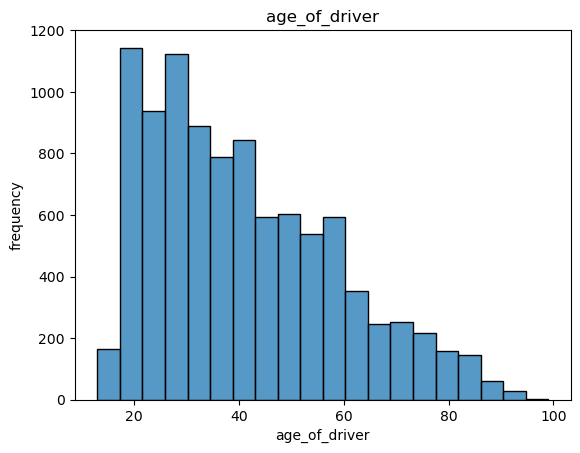

In [44]:
sns.histplot(df['age_of_driver'], bins=20)
# add x/y labels
plt.xlabel("age_of_driver")
plt.ylabel("frequency")
# add title
plt.title("age_of_driver")

### Descriptive Statistics for 'Age Band of Driver'

In [45]:
#independent variable
#age_band_of_casualty
pd.DataFrame(df['age_band_of_driver'].describe())

,age_band_of_driver
count,9685.000000
mean,6.926071
std,1.895697
min,3.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,11.000000


From the table above, it is clear to see that there was a mean average age band which was roughly '6.93' with a standard deviation of '1.88'. The minimum value of the age band was 3, whilst the maximum was 11.

From the Histogram below, we can see a visual representation of the different age bands of drivers. Age bands: 6, 7 and 8 were the most common age bands which indiviuals involved in accidents fell into.

Text(0.5, 1.0, 'age_band_of_driver')

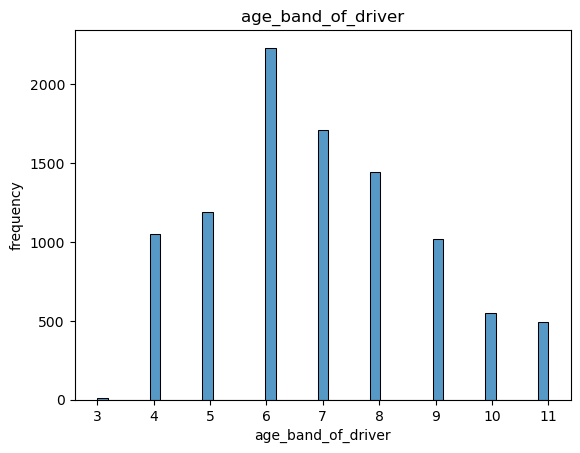

In [46]:
sns.histplot(df['age_band_of_driver'])
# add x/y labels
plt.xlabel("age_band_of_driver")
plt.ylabel("frequency")
# add title
plt.title("age_band_of_driver")

In [47]:
pd.DataFrame(df.groupby('age_band_of_driver').size())

,0
age_band_of_driver,
3.0,7
4.0,1053
5.0,1188
6.0,2233
7.0,1707
8.0,1441
9.0,1019
10.0,547
11.0,490


### Descriptive Statistics for 'Engine Capacity'

In [48]:
#independent variable
#engine_capacity_cc
pd.DataFrame(df['engine_capacity_cc'].describe())

,engine_capacity_cc
count,9685.000000
mean,1517.757770
std,866.785564
min,49.000000
25%,1199.000000
50%,1497.000000
75%,1950.000000
max,12809.000000


As highlighted above from the table, we can see that the mean engine capacity(cc), was roughly '1571' with a standard deviation of '1153'. The minimum capacity was '49cc' whilst the maximum was '16,353cc'.

The histogram below indicates the most common engine capacites involved in accidents. We can see that the most common accidents occured where the engine capacity was between '49cc' and just under '2000cc' ('1968cc'). There is a huge decline after this engine capacity which highlights little to no severe accidents involving casualties.

Most accidents involved vehilces with lower engine capcities. The minimum engine capacity was 49cc whilst the maximum was 16,353cc, where the mean average engine capacity was 1571cc. From the histogram below we can see that most accidents occured with lower engine capacities and this could be due to factors such as performance issues and limitations. The imbalance of the range of vehicles in terms of their engine capacity and performance could result in accidents on the road.

Vehicles with lower engine capacities may be more commonly used in urban areas or on roads where there is lower speed limits, where there is a higher density of traffic and a greater potential for accidents. We can also see that Urban Areas were found to be the area where most accidents occured.

Or probably, the values at the left of the distribution are mistakes or typos.

Text(0.5, 1.0, 'engine_capacity_cc')

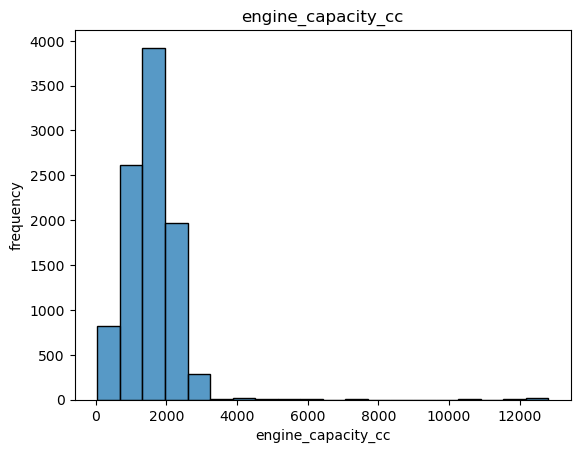

In [49]:
sns.histplot(df['engine_capacity_cc'], bins=20)
# add x/y labels
plt.xlabel("engine_capacity_cc")
plt.ylabel("frequency")
# add title
plt.title("engine_capacity_cc")

### Descriptive Statistics for 'Propulsion Code'

In [50]:
#independent variable
#propulsion_code
pd.DataFrame(df['propulsion_code'].describe())

,propulsion_code
count,9685
unique,5
top,Petrol
freq,5850


From the table above, we can see that most accidents had involved vehicles which run on petrol as a fuel type.

The count plot below further indicates 'Petrol' was the most common fuel type, however, 'Heavy Oil' was also a common fuel type during the cases of accidents.

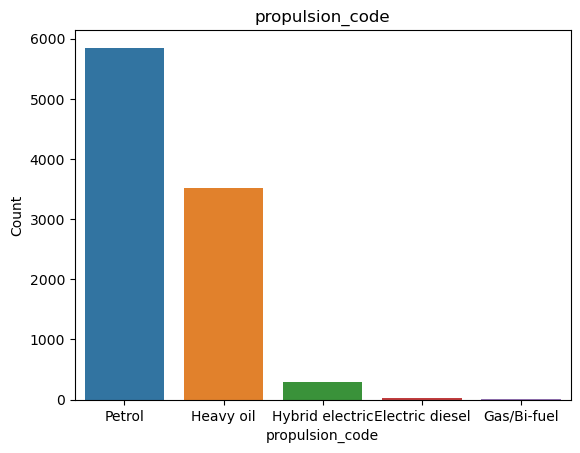

In [51]:
sns.countplot(x='propulsion_code', data=df)
plt.title('propulsion_code')
plt.xlabel('propulsion_code')
plt.ylabel('Count')
plt.show()

### Descriptive Statistics for 'Age of Vehcile'

In [52]:
#independent variable
#age_of_vehicle
pd.DataFrame(df['age_of_vehicle'].describe())

,age_of_vehicle
count,9685.000000
mean,9.283531
std,5.807754
min,0.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,49.000000


The table above suggests that the mean age of the vehciles involved in accidents was roughly '9' years old. There is a standard deviation of roughly '6' years.

The box plot below was used to further illustrate the variance and distribution of vehicle ages involved in accidents. We can see that the most common accidents occured when the vechile was between the ages of '5' and '13' years old. We can see a large number of outliers for this particular independent variable. Almost certainly, some of them are mistakes or typos as it is highly improbable a car of 63 years ago is still on the street.

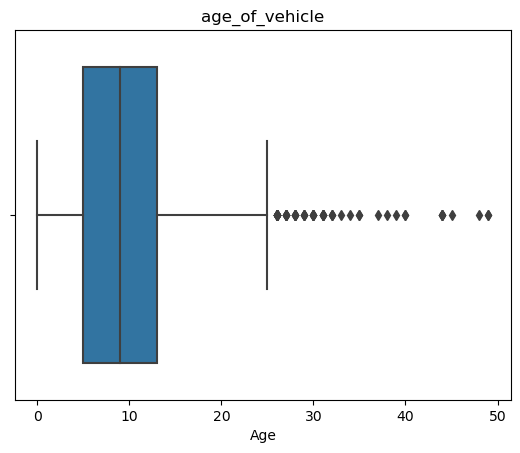

In [53]:
sns.boxplot(x='age_of_vehicle', data=df)
plt.title('age_of_vehicle')
plt.xlabel('Age')
plt.show()

### Descriptive Statistics for 'Driver imd dedcile'

In [54]:

#independent variable
#driver_imd_decile
pd.DataFrame(df['driver_imd_decile'].describe())

,driver_imd_decile
count,9685
unique,10
top,Less deprived 30-40%
freq,1057


In [55]:
pd.DataFrame(df.groupby('driver_imd_decile').size())

,0
driver_imd_decile,
Least deprived 10%,853
Less deprived 10-20%,918
Less deprived 20-30%,963
Less deprived 30-40%,1057
Less deprived 40-50%,1055
More deprived 10-20%,877
More deprived 20-30%,946
More deprived 30-40%,1034
More deprived 40-50%,1055


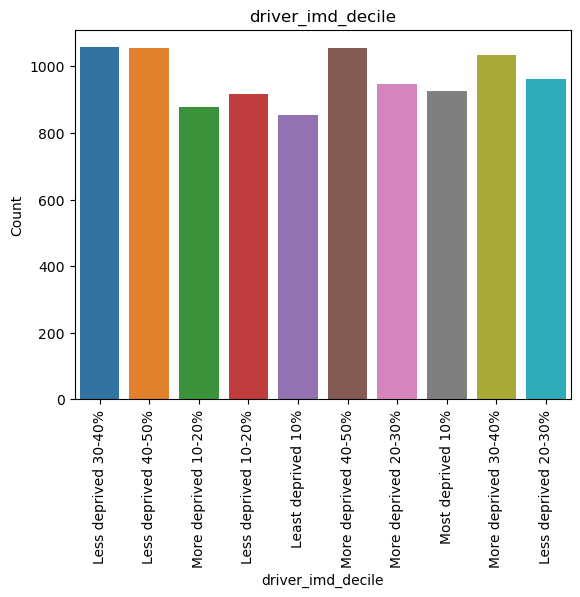

In [56]:
sns.countplot(x='driver_imd_decile', data=df)
plt.title('driver_imd_decile')
plt.xlabel('driver_imd_decile')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Descriptive Statistics for 'Driver Home Area Type'

In [57]:
#independent variable
#driver_home_area_type
pd.DataFrame(df['driver_home_area_type'].describe())

,driver_home_area_type
count,9685
unique,3
top,Urban area
freq,6998


The table above indicates that Urban Areas was the region which involved the most severe accidents.  

The count plot below further supports this finding, as we can see that Urban Areas show a strong distribution of accidents in comparison to Rural and Small Town areas. This could be due to heavily populated areas especially during rush hour where there is a higher chance of being involved in an accident with another vehicle or multiple vehicles.

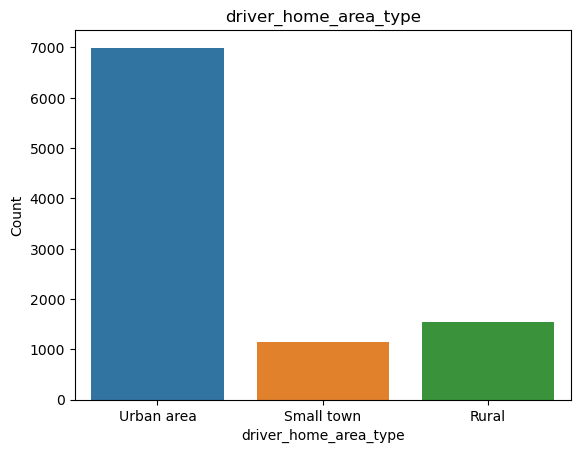

In [58]:
sns.countplot(x='driver_home_area_type', data=df)
plt.title('driver_home_area_type')
plt.xlabel('driver_home_area_type')
plt.ylabel('Count')
plt.show()

### Descriptive Statistics for 'Number of Vehicles'

In [59]:
#independent variable
#number_of_vehicles
pd.DataFrame(df['number_of_vehicles'].describe())

,number_of_vehicles
count,9685.000000
mean,2.082395
std,0.756239
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,10.000000


The table above indicates the average number of vehicles involved in accidents was '2' vehicles, with a standard deviation of roughly 0.77. The minimum number of vehilces involved in accidents was 1, where as the maximum number of vehicles in a rare case was 10.

The histogram clearly illustrates a distinct difference between the number of vehicles involved in accidents. We can see that most accidents involved 2 vehicles.

Text(0.5, 1.0, 'number_of_vehicles')

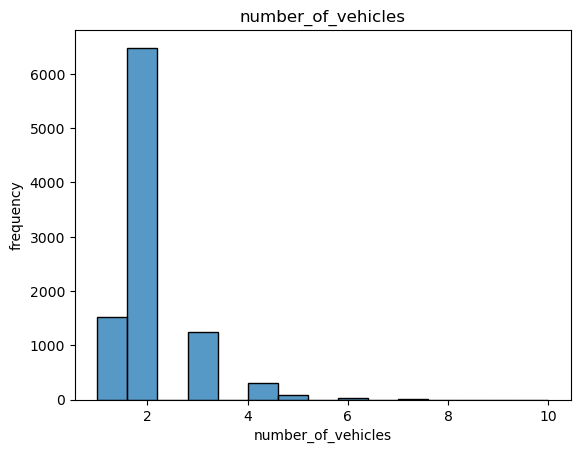

In [60]:
sns.histplot(df['number_of_vehicles'])
# add x/y labels
plt.xlabel("number_of_vehicles")
plt.ylabel("frequency")
# add title
plt.title("number_of_vehicles")


### Descriptive Statistics for 'Number of Casualties'

In [61]:
#independent variable
#number_of_casualties
pd.DataFrame(df['number_of_casualties'].describe())

,number_of_casualties
count,9685.000000
mean,1.718844
std,1.101959
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


It is evident from the table above, that we can see the mean average for the number of casualties involved in accidents was roughly '1.68' with a standard deviation of roughly '1.03'.

The histogram suggests that the most accidents involved 1 casualty, however, there are many cases where there has been 2 casualties. This aligns with the number of vehicles involved in accidents. Most of the time, there was two vehicles involved in severe accidents leading to casualties, this can be further supported below, as many accidents resulted in at least 1 casualty, and in a lot of other cases, 2 casulaties.

Text(0.5, 1.0, 'number_of_casualties')

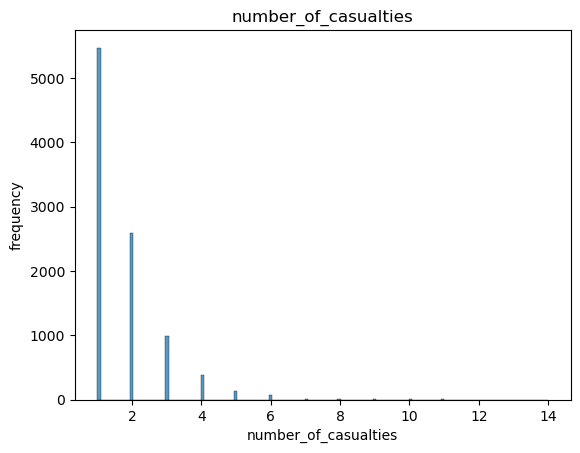

In [62]:
sns.histplot(df['number_of_casualties'])
# add x/y labels
plt.xlabel("number_of_casualties")
plt.ylabel("frequency")
# add title
plt.title("number_of_casualties")

### Descriptive Statistics for 'Sex of Driver' in relation to other variables

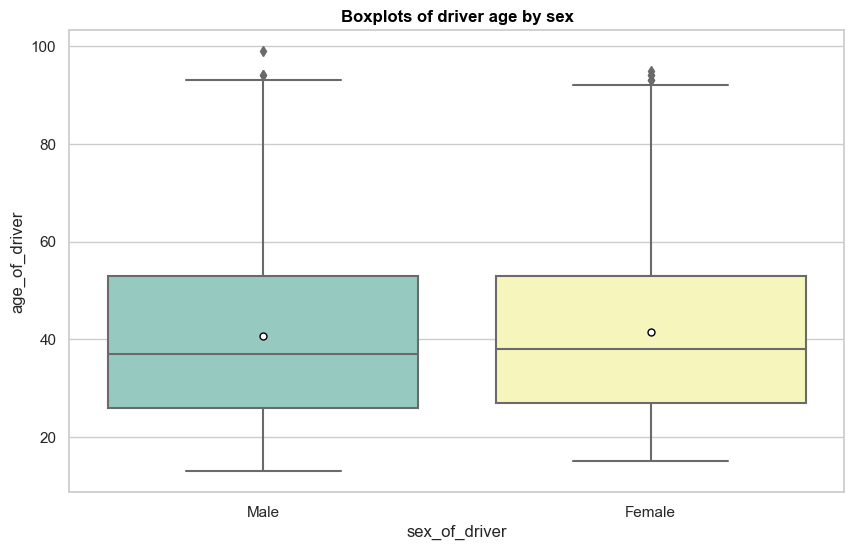

In [63]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='sex_of_driver', y='age_of_driver', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of driver age by sex', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.show()

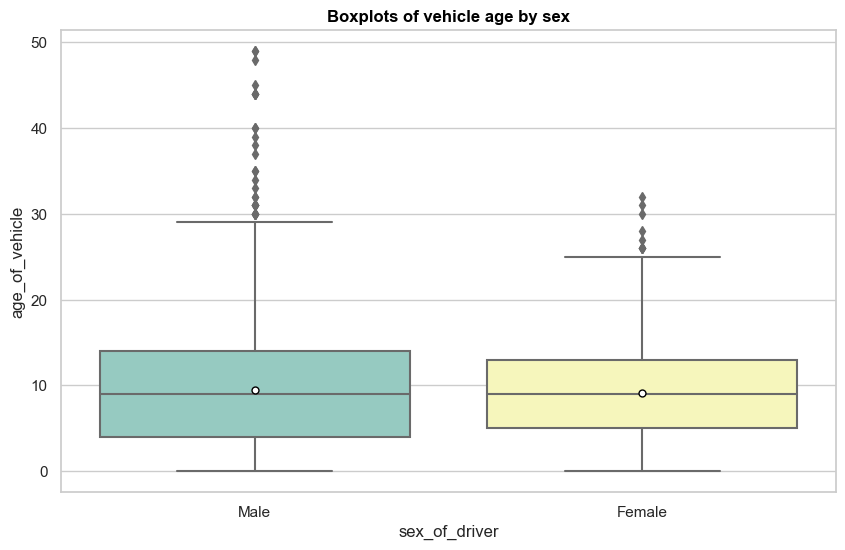

In [64]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='sex_of_driver', y='age_of_vehicle', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of vehicle age by sex', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.show()

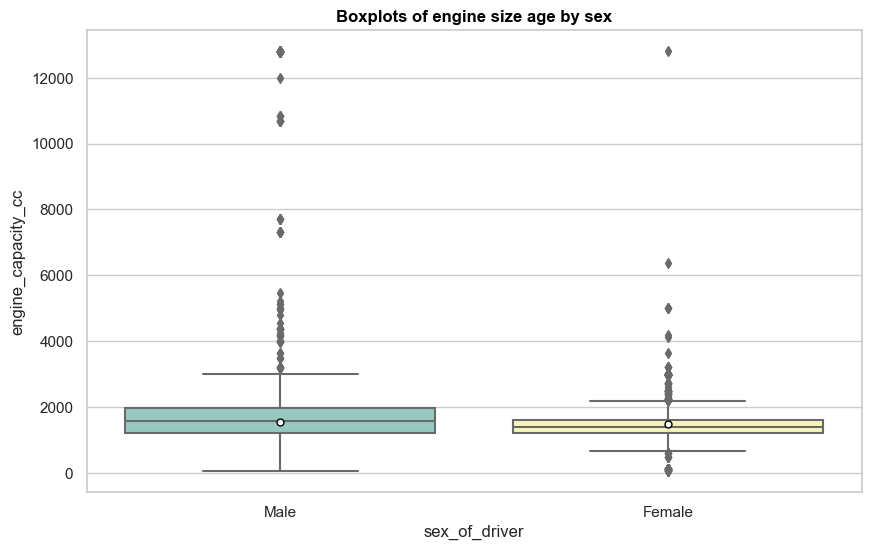

In [65]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='sex_of_driver', y='engine_capacity_cc', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine size age by sex', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.show()

In [66]:
mean_sex = df.groupby('sex_of_driver').mean()
mean_sex

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
sex_of_driver,,,,,,,
Female,41.395416,6.995522,1473.043467,9.047945,2.795574,2.118546,1.718388
Male,40.619290,6.881304,1546.580234,9.435388,2.697232,2.059093,1.719137


From the output above, 

- the average age who had an accident is higher for women

- men on average drive vehicles with a higher engine capacity then women

- men on average drive older vehicles than women

In [67]:
a = df[df['sex_of_driver'] == 'Female']['accident_severity']
b = df[df['sex_of_driver'] == 'Male']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 9.680530911155778, p-value: 4.591943132159529e-22


By testing the eqaul means of men and women for the accident severity we can claim there is a difference in accident severity between men and women

In [68]:
a = df[df['sex_of_driver'] == 'Female']['number_of_vehicles']
b = df[df['sex_of_driver'] == 'Male']['number_of_vehicles']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 3.7795829659673066, p-value: 0.00015803415323154102


By testing the eqaul means of men and women for the number of vehicle involved, we can claim there is a difference in accident severity between men and women

In [69]:
a = df[df['sex_of_driver'] == 'Female']['number_of_casualties']
b = df[df['sex_of_driver'] == 'Male']['number_of_casualties']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -0.03267945328323424, p-value: 0.9739308825951988


By testing the eqaul means of men and women for the number of casualties per accident, we can claim there is **NO** difference in accident severity between men and women

### Descriptive Statistics for 'model' in relation to other variables

In [70]:
df['model'].unique().shape

(27,)

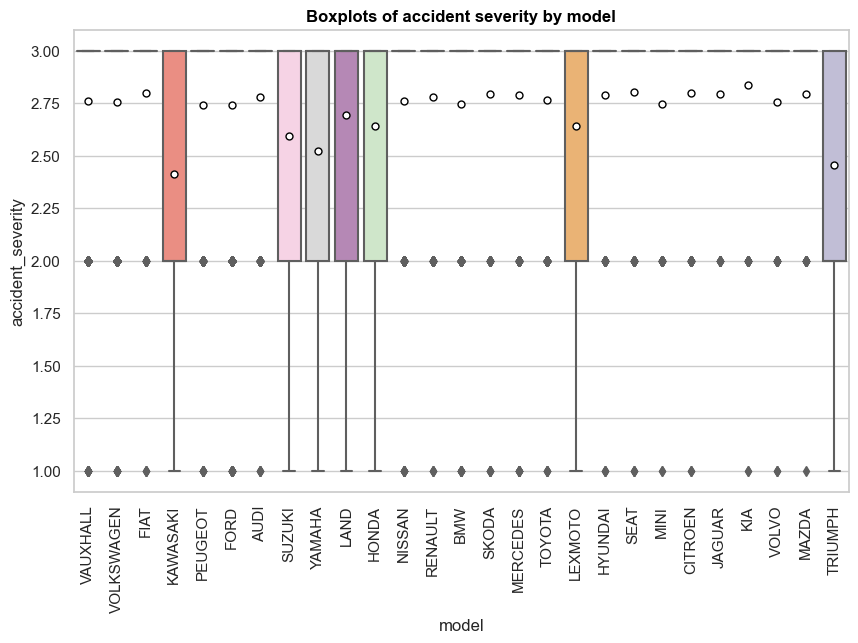

In [71]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='model', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of accident severity by model', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

**This graph is very useful, because we can see the riskiest cars/motors which are those that touch the bottom / have the lower average (white point)**

As one would expect, motorbikes have are riskier

In [72]:
df.groupby('model').size().sort_values(ascending=False)

model
FORD          1268
VAUXHALL       982
VOLKSWAGEN     806
HONDA          697
BMW            586
TOYOTA         494
AUDI           483
PEUGEOT        451
MERCEDES       449
NISSAN         396
YAMAHA         289
CITROEN        278
RENAULT        269
SUZUKI         257
SKODA          228
SEAT           222
FIAT           209
KIA            205
MINI           194
HYUNDAI        193
LAND           166
VOLVO          131
MAZDA          121
KAWASAKI       102
TRIUMPH         81
LEXMOTO         70
JAGUAR          58
dtype: int64

MITSUBISHI is the only one that doesn't have a fatal accident, but one should consider that there are only 53 records in the dataset, so this can be because of a under-representation of this vehicle

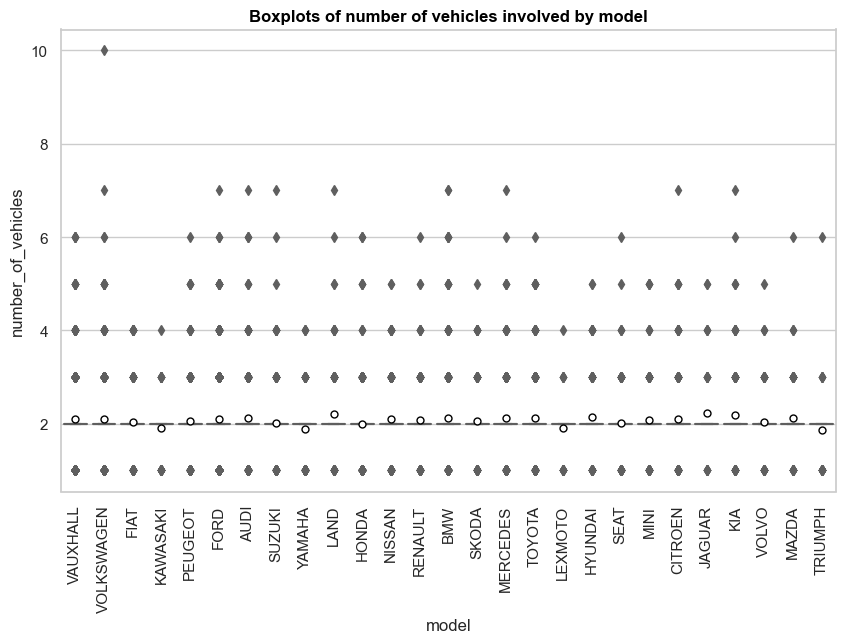

In [73]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='model', y='number_of_vehicles', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of number of vehicles involved by model', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

Motorbikes are less involved in multiple accidents than cars.

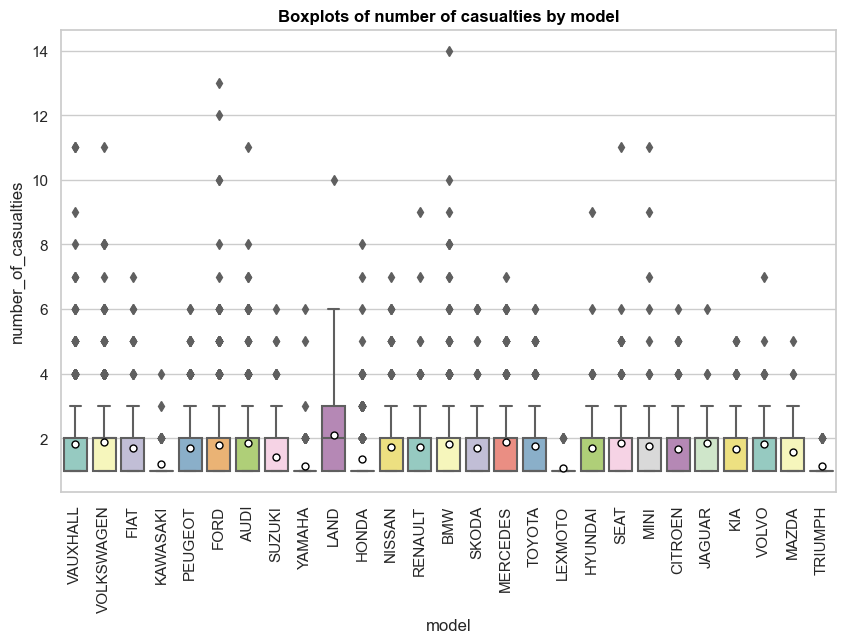

In [74]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='model', y='number_of_casualties', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of number of casualties by model', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

Motorbikes have the less number of casualties compared to cars (look at the average, the white point)

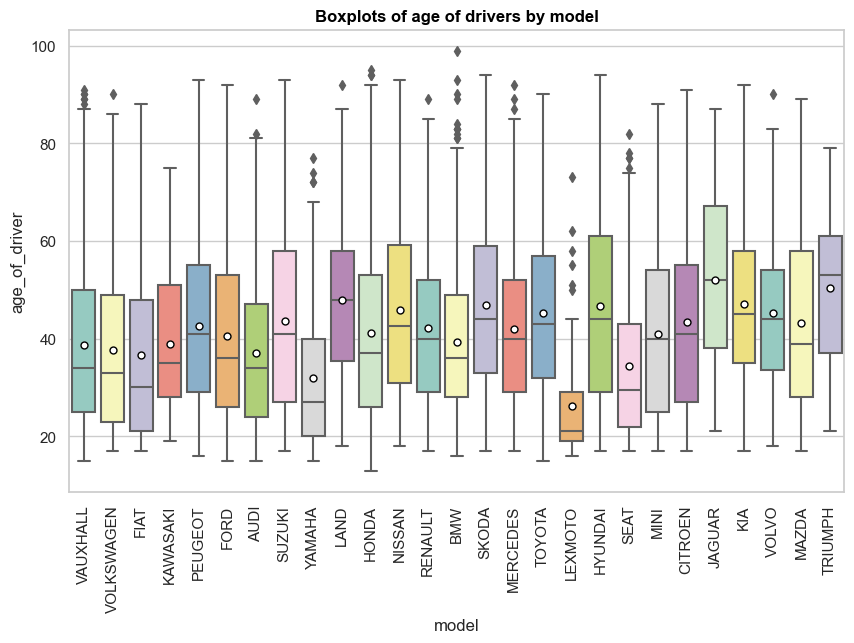

In [75]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='model', y='age_of_driver', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of age of drivers by model', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

There is no identifiable pattern in this graph. In fact, the average age of drivers per vehicles differs a lot, it is normal to expect that expensive brands are used by older individuals who may afford them, but this is not always the case. This can be due to the high variability of cars within the same car brand.

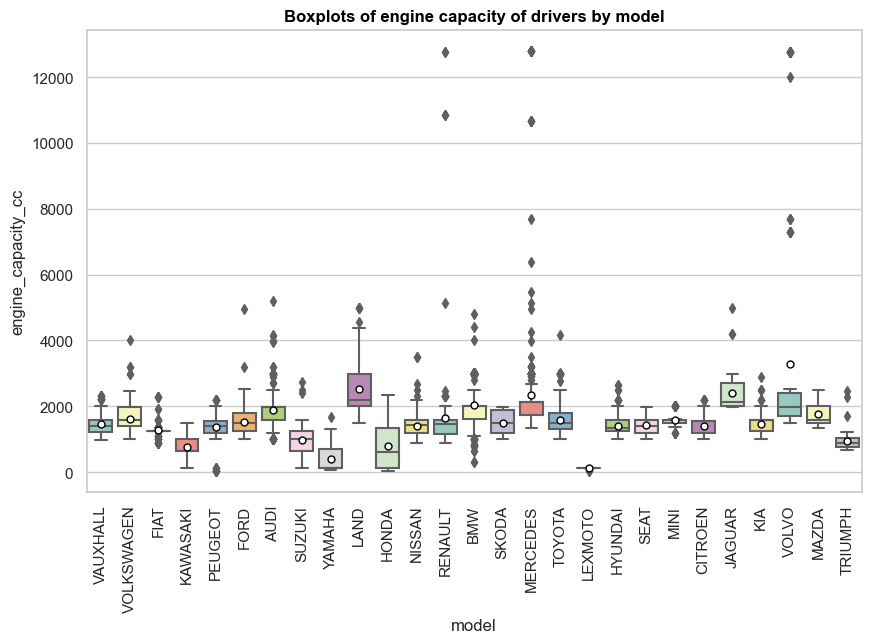

In [76]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='model', y='engine_capacity_cc', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity of drivers by model', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

This graph confirms the presence of outliers in the engine_capacity_cc feature was unjustified! In fact Volvo produces tracks which can have a high engine capacity!

In [77]:
mean_model = df.groupby('model').mean().sort_values(by='accident_severity', ascending=False)
mean_model

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
model,,,,,,,
KIA,47.019512,7.614634,1475.985366,7.185366,2.834146,2.195122,1.658537
SEAT,34.301802,6.225225,1441.761261,8.779279,2.801802,2.018018,1.842342
FIAT,36.674641,6.430622,1269.578947,9.459330,2.799043,2.033493,1.708134
CITROEN,43.320144,7.140288,1409.284173,9.187050,2.798561,2.093525,1.669065
SKODA,46.885965,7.535088,1494.206140,8.605263,2.793860,2.061404,1.706140
MAZDA,43.206612,7.247934,1755.380165,10.181818,2.793388,2.132231,1.586777
JAGUAR,51.982759,8.137931,2405.810345,8.431034,2.793103,2.224138,1.862069
HYUNDAI,46.678756,7.507772,1412.310881,7.227979,2.787565,2.139896,1.699482
MERCEDES,42.060134,7.111359,2353.031180,7.222717,2.786192,2.120267,1.877506


The table summarises all the numerical specifications for the brand of the vehicle ranked by accident severity, from the safest to the riskiest. The riskiest are Yamaha, Triumph and Kawasaki, motorbikes as previously said and expected.

### Descriptive Statistics for 'driver_imd_decile' in relation to other variables

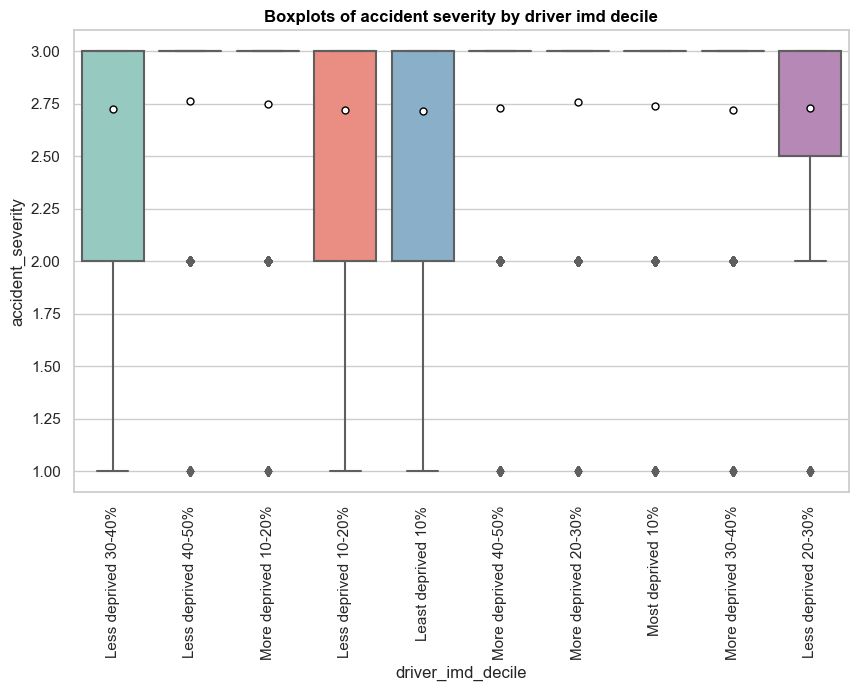

In [78]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='driver_imd_decile', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of accident severity by driver imd decile', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

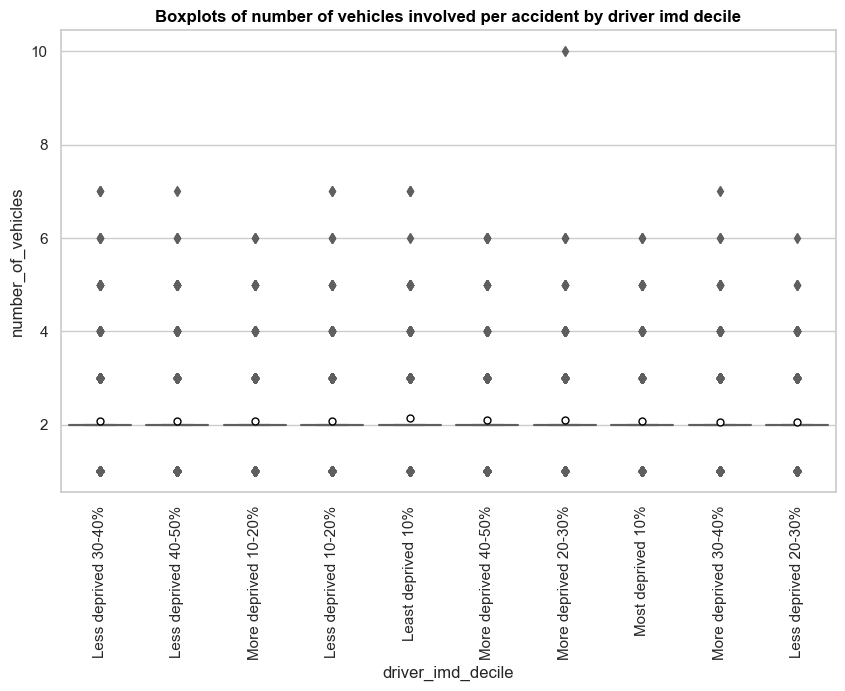

In [79]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='driver_imd_decile', y='number_of_vehicles', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of number of vehicles involved per accident by driver imd decile', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

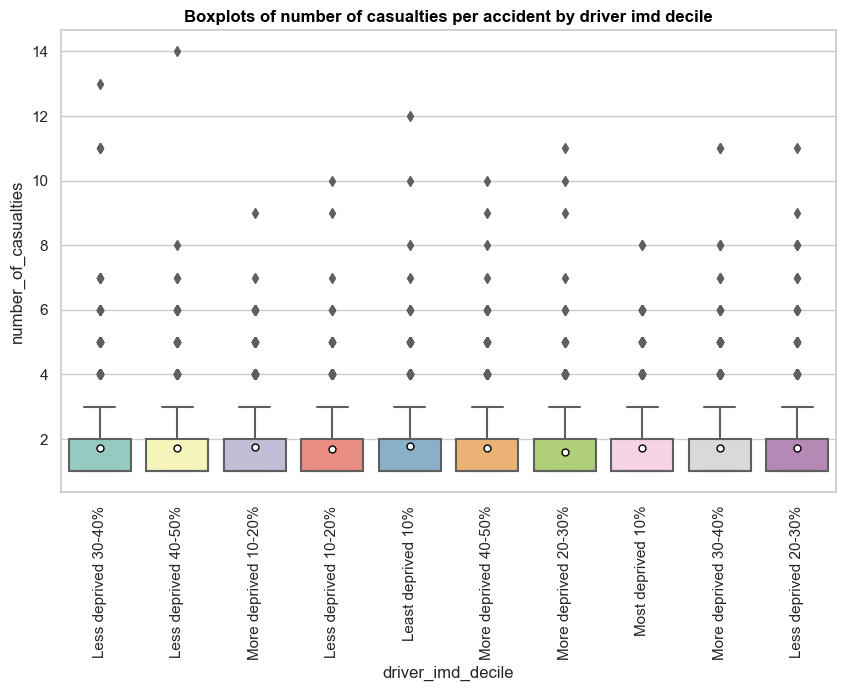

In [80]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='driver_imd_decile', y='number_of_casualties', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of number of casualties per accident by driver imd decile', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [81]:
mean_model = df.groupby('driver_imd_decile').mean().sort_values(by='accident_severity', ascending=False)
mean_model

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
driver_imd_decile,,,,,,,
Less deprived 40-50%,41.567773,6.978199,1499.509005,9.222749,2.763981,2.072986,1.720379
More deprived 20-30%,38.966173,6.748414,1505.221987,9.535941,2.756871,2.108879,1.615222
More deprived 10-20%,38.142531,6.653364,1505.072976,9.897377,2.750285,2.083238,1.757127
Most deprived 10%,37.026969,6.557713,1523.586839,10.010787,2.740022,2.075512,1.740022
More deprived 40-50%,40.553555,6.889100,1561.948815,9.494787,2.732701,2.092891,1.734597
Less deprived 20-30%,42.409138,7.074766,1504.593977,8.894081,2.728972,2.051921,1.720665
Less deprived 30-40%,43.257332,7.150426,1521.302744,9.159886,2.723746,2.077578,1.729423
More deprived 30-40%,40.412959,6.881044,1525.315280,9.382979,2.723404,2.055126,1.717602
Less deprived 10-20%,42.588235,7.069717,1498.477124,8.581699,2.718954,2.070806,1.685185


In [82]:
a = df[df['driver_imd_decile'] == 'Less deprived 40-50%']['accident_severity']
b = df[df['driver_imd_decile'] == 'Most deprived 10%']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 1.118164713516028, p-value: 0.2636322968674739


In [83]:
a = df[df['driver_imd_decile'] == 'Least deprived 10%']['accident_severity']
b = df[df['driver_imd_decile'] == 'Most deprived 10%']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -0.9585679396507473, p-value: 0.33790677495677757


In the table above, the imd deciles are ordered by riskiness, from the safest to the riskiest. Nevertheless, we claim there is a statistical difference in the averages of accident severity only between the safest and the riskiest classes with a confidence 99.8%

As such, knowing the imd decile class may not be extremely useful.

### Descriptive Statistics for 'age_band_of_driver' in relation to other variables

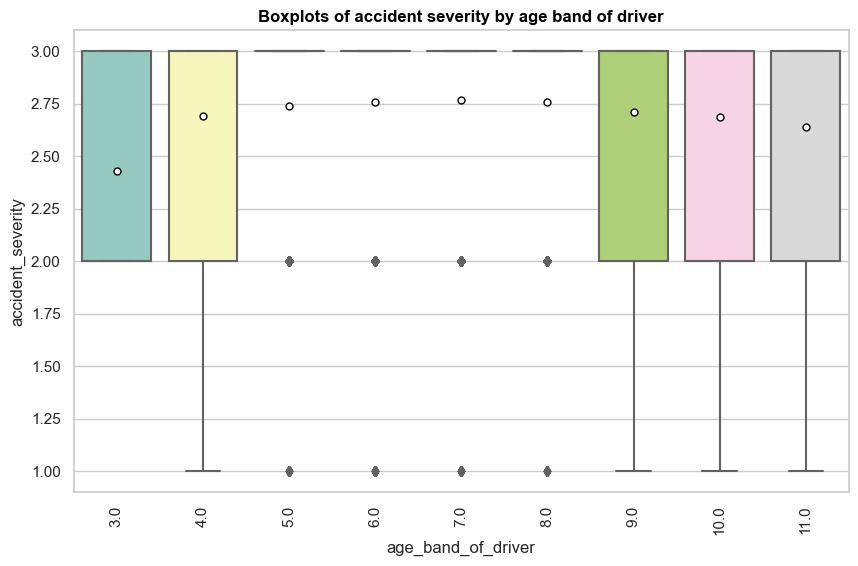

In [84]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='age_band_of_driver', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of accident severity by age band of driver', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

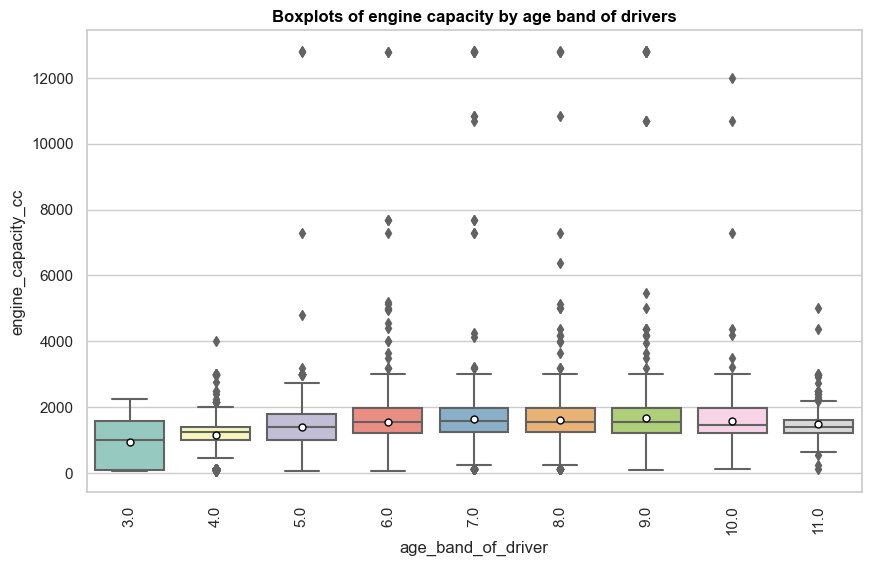

In [85]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='age_band_of_driver', y='engine_capacity_cc', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity by age band of drivers', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [86]:
df.groupby('age_band_of_driver').mean().sort_values(by='accident_severity', ascending=False)

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
age_band_of_driver,,,,,,
7.0,40.243117,1629.400703,9.075571,2.766842,2.127124,1.720562
8.0,50.369188,1611.170715,8.890354,2.760583,2.165857,1.706454
6.0,30.530228,1535.596955,9.257949,2.758173,2.123601,1.708912
5.0,22.965488,1380.306397,9.362795,2.739899,2.006734,1.705387
9.0,59.980373,1679.157998,9.189401,2.712463,2.122669,1.655545
4.0,18.668566,1157.394112,9.994302,2.694207,1.855651,1.821462
10.0,70.533821,1581.000000,9.126143,2.687386,2.142596,1.765996
11.0,81.936735,1482.414286,9.861224,2.638776,2.016327,1.687755
3.0,14.428571,945.714286,14.285714,2.428571,1.857143,1.571429


the following categories of drivers are at most risk:
- band 3 --> drivers between 11 - 15
- band 11 --> drivers over 75
- band 10 --> drivers between 66 - 75

In [87]:
a = df[df['age_band_of_driver'] == 3.0]['accident_severity']
b = df[df['age_band_of_driver'] == 11.0]['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -0.945704094450531, p-value: 0.34476092956231763


In [88]:
a = df[df['age_band_of_driver'] == 5.0]['accident_severity']
b = df[df['age_band_of_driver'] == 11.0]['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 3.6361491424878607, p-value: 0.00028510862004611483


There is a statistical difference in the average accident severity between the age band of driver of category 11 and 5, with a confidence of 95%.
And between 3 and 11, confidence 95%.

### Descriptive Statistics for 'driver_home_area_type' in relation to other variables

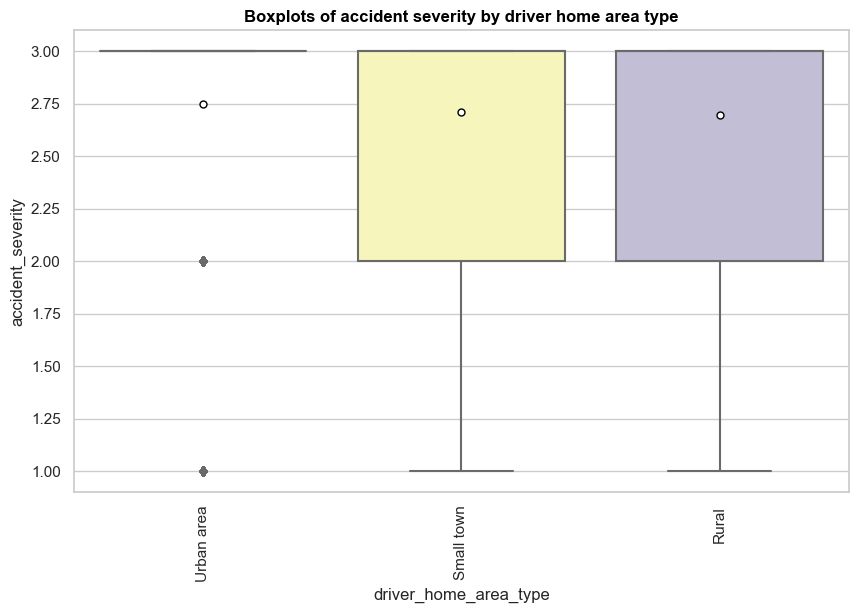

In [89]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='driver_home_area_type', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of accident severity by driver home area type', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

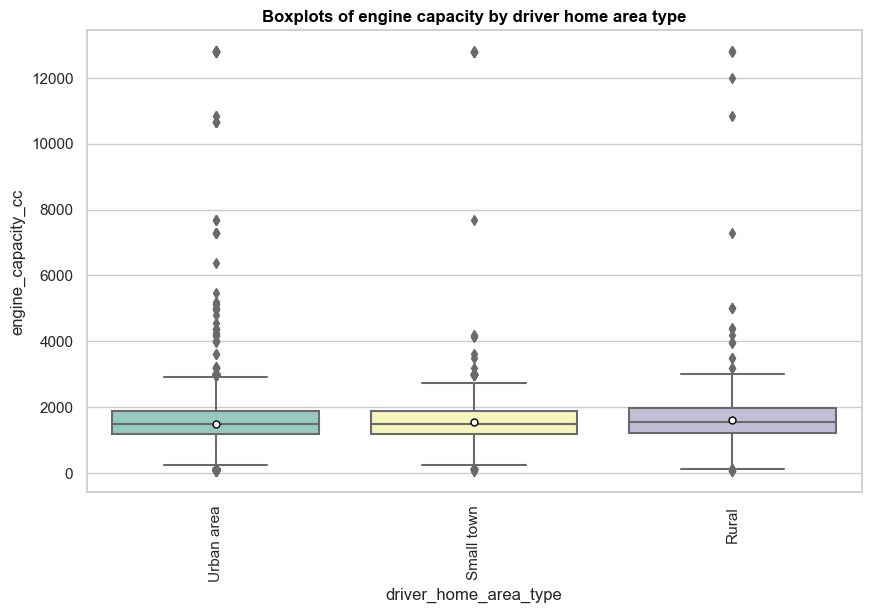

In [90]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='driver_home_area_type', y='engine_capacity_cc', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity by driver home area type', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [91]:
df.groupby('driver_home_area_type').mean().sort_values(by='accident_severity', ascending=False)

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
driver_home_area_type,,,,,,,
Urban area,40.016290,6.843527,1492.317519,9.157188,2.748357,2.104316,1.706345
Small town,43.009565,7.126957,1555.973043,9.532174,2.712174,2.053043,1.730435
Rural,43.493169,7.151594,1604.994795,9.672739,2.696161,2.004554,1.767079


In [92]:
a = df[df['driver_home_area_type'] == 'Rural']['accident_severity']
b = df[df['driver_home_area_type'] == 'Urban area']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -3.797987434588452, p-value: 0.00014688797193723196


In [93]:
a = df[df['driver_home_area_type'] == 'Small town']['accident_severity']
b = df[df['driver_home_area_type'] == 'Urban area']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: -2.3474015889436486, p-value: 0.018928671389710203


In [94]:
a = df[df['driver_home_area_type'] == 'Small town']['accident_severity']
b = df[df['driver_home_area_type'] == 'Rural']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 0.8004336117376869, p-value: 0.4235304291526789


There is a statistical difference in the averages of accident severity between who live in Rural and Urban area, between who live in small town and Urban.

Confidence level 99%

### Descriptive Statistics for 'vehicle manoeuvre'

This variable cannot be known by the company in advance, nevertheless, it is interesting to see what are the riskiest manoevres, as it can be useful to put specific points about them in the contract. The same is true for junction location, see the other variable below.

After showing this chart, we romove the two variables, as it cannot be known in advance.

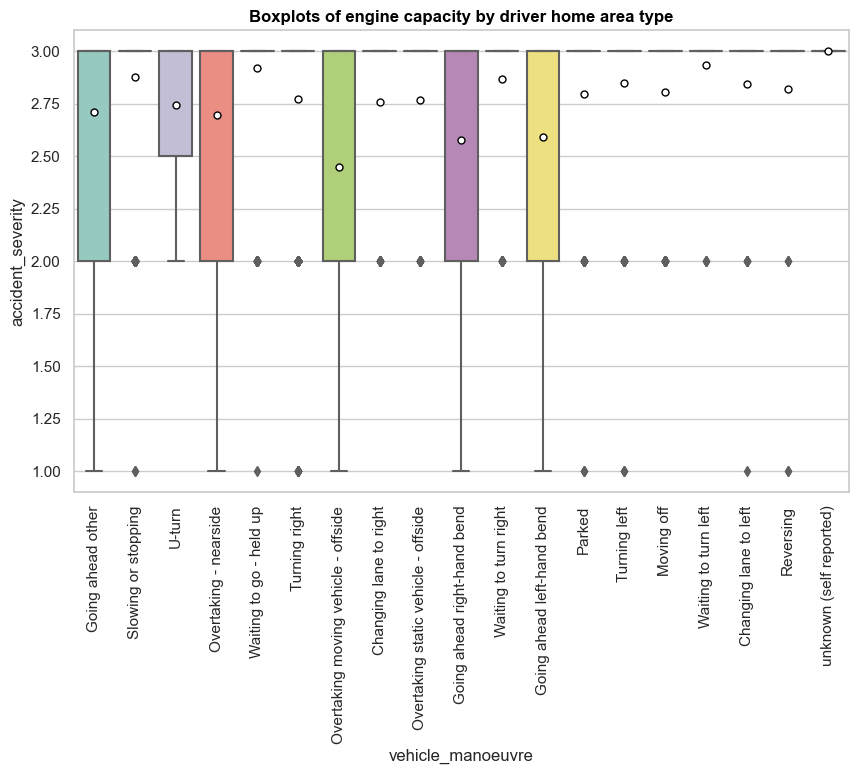

In [95]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='vehicle_manoeuvre', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity by driver home area type', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [96]:
df.groupby('vehicle_manoeuvre').mean().sort_values(by = 'accident_severity', ascending=False)

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
vehicle_manoeuvre,,,,,,,
unknown (self reported),21.000000,5.000000,1798.000000,14.000000,3.000000,1.000000,1.000000
Waiting to turn left,44.016129,7.387097,1440.209677,8.548387,2.935484,2.145161,1.580645
Waiting to go - held up,40.879389,6.970992,1562.969466,8.338931,2.920611,2.410687,1.633588
Slowing or stopping,41.940058,7.100877,1504.964912,8.328947,2.877193,2.466374,1.789474
Waiting to turn right,45.200000,7.425000,1489.106250,8.562500,2.868750,2.243750,1.831250
Turning left,40.901961,6.965686,1470.058824,9.583333,2.848039,1.862745,1.568627
Changing lane to left,39.484375,6.859375,1436.125000,8.453125,2.843750,2.015625,1.375000
Reversing,57.743590,8.615385,1573.307692,9.410256,2.820513,1.717949,1.384615
Moving off,45.490196,7.392157,1496.702614,9.307190,2.807190,2.035948,1.702614


In [97]:
df = df.drop(columns=['vehicle_manoeuvre'])
df.shape

(9685, 16)

### Descriptive Statistics for 'juncture_location'

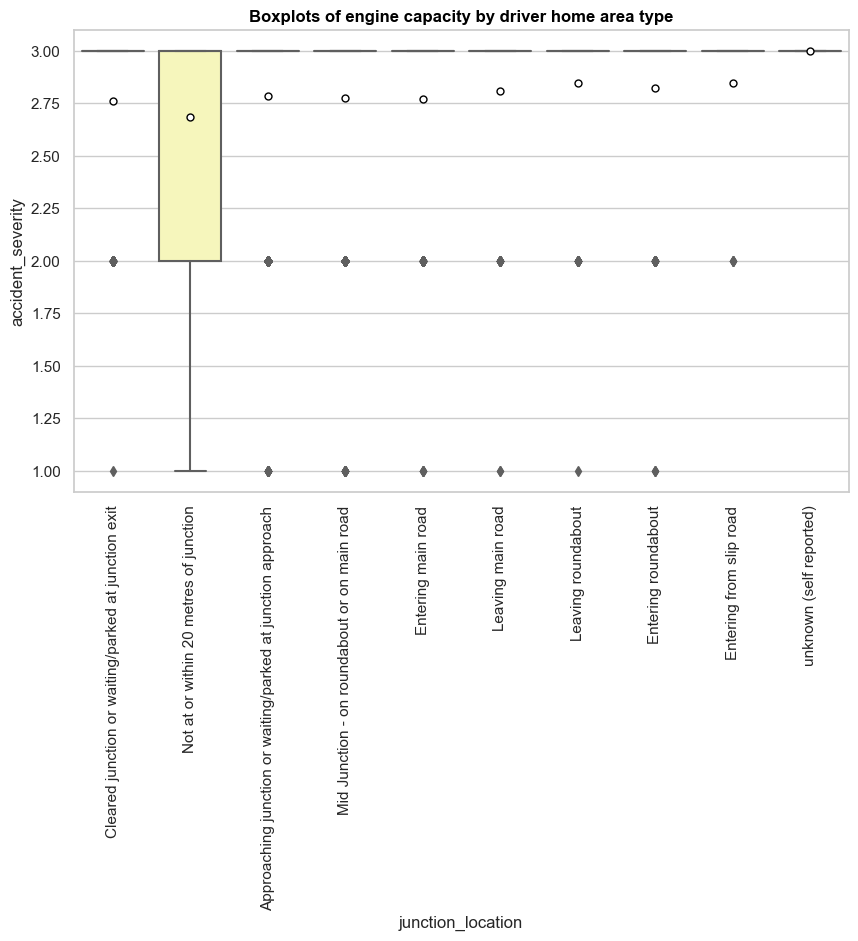

In [98]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='junction_location', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity by driver home area type', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [99]:
df = df.drop(columns=['junction_location'])
df.shape

(9685, 15)

### Descriptive Statistics for 'juncture_location'

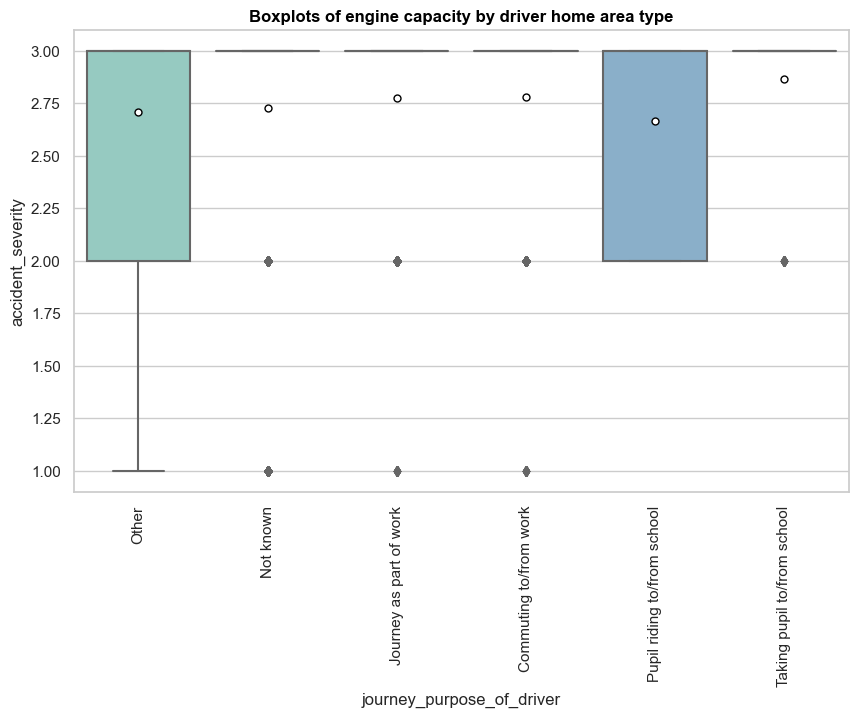

In [100]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')

meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":5}

ax = sns.boxplot(x='journey_purpose_of_driver', y='accident_severity', data=df, 
                 showmeans=True, meanprops=meanprops, palette='Set3')

ax.set_title('Boxplots of engine capacity by driver home area type', 
             fontdict={'fontsize': 12, 'fontweight': 'bold', 'color': 'black', 'fontname': 'Arial'})

plt.xticks(rotation=90)
plt.show()

In [101]:
df.groupby('journey_purpose_of_driver').mean().sort_values(by='accident_severity', ascending=False)

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,number_of_vehicles,number_of_casualties
journey_purpose_of_driver,,,,,,,
Taking pupil to/from school,41.377953,7.031496,1673.992126,9.055118,2.866142,2.125984,1.850394
Commuting to/from work,37.723506,6.612749,1439.337849,9.151394,2.780080,2.084462,1.484462
Journey as part of work,40.232794,6.910931,1897.390688,7.194332,2.775304,2.198381,1.653846
Not known,41.308363,6.962332,1471.347308,9.656948,2.727814,2.062141,1.710151
Other,42.141811,7.027360,1491.571098,9.494027,2.707900,2.071291,1.865896
Pupil riding to/from school,25.238095,5.095238,1019.428571,7.285714,2.666667,2.142857,1.761905


In [102]:
a = df[df['journey_purpose_of_driver'] == 'Taking pupil to/from school']['accident_severity']
b = df[df['journey_purpose_of_driver'] == 'Pupil riding to/from school']['accident_severity']

t_val, p_val = stats.ttest_ind(a, b)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 2.323511033360276, p-value: 0.021531968141090072


The purpose of driver's journey is to very relevant, in fact there is no statistical difference in the means of the two most extreme classifications with a confidence level of 99%, though there is with 95% confidence level.

This means this variable can have an inpact, but only when extremes are considered, overall we do not expect this variable to be very relevant.

# TRAIN TEST SPLIT

Before stepping to the outlier manipulation it is important to remember our graphs were referred to the entire dataset. from now on, we have to use the train and test to fit the manipulations on the trainset and then apply them o the test set

In [18]:
x = df.copy()
y = df.copy()

x = x.drop(columns=['accident_severity'])
y = y['accident_severity']

In [19]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=24, stratify=y)

In [20]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7415, 22)
(1854, 22)
(7415,)
(1854,)


# MAKE DUMMY VARIABLES WITH ONE HOT ENCORED

Before using iForest, we need to transofrm the categorical vairables into dummies, because iForest does not consider categorical variables

In [21]:
one_hot_encoder = OneHotEncoder(drop="first", sparse=False) # drop = first --> avoid multicollinearity

#### CREATE CATEGORICAL COLUMNS

In [22]:
xtrain.dtypes

accident_reference           object
casualty_class               object
sex_of_driver                object
age_of_driver                 int64
age_band_of_casualty          int64
casualty_severity             int64
casualty_type                object
casualty_imd_decile          object
vehicle_manoeuvre            object
junction_location            object
journey_purpose_of_driver    object
age_band_of_driver            int64
engine_capacity_cc            int64
propulsion_code              object
age_of_vehicle                int64
generic_make_model           object
driver_imd_decile            object
driver_home_area_type        object
number_of_vehicles            int64
number_of_casualties          int64
day_of_week                  object
speed_limit                   int64
dtype: object

Objects are categorical variables

In [108]:
cat_cols = ['sex_of_driver', 'journey_purpose_of_driver', 'propulsion_code', 'driver_imd_decile', 'driver_home_area_type', 'model']

cat_val = xtrain[cat_cols]
cat_val

,sex_of_driver,journey_purpose_of_driver,propulsion_code,driver_imd_decile,driver_home_area_type,model
32845,Female,Not known,Petrol,Less deprived 20-30%,Rural,PEUGEOT
3844,Female,Not known,Heavy oil,Less deprived 30-40%,Small town,LAND
26009,Male,Other,Petrol,Less deprived 30-40%,Urban area,HONDA
24864,Male,Not known,Petrol,Less deprived 10-20%,Urban area,VOLKSWAGEN
34415,Male,Not known,Petrol,Less deprived 40-50%,Urban area,VOLKSWAGEN
...,...,...,...,...,...,...
16052,Female,Commuting to/from work,Petrol,Less deprived 40-50%,Small town,FIAT
7349,Male,Journey as part of work,Heavy oil,More deprived 10-20%,Urban area,AUDI
11964,Female,Other,Heavy oil,Less deprived 40-50%,Rural,MINI
22997,Male,Not known,Petrol,Least deprived 10%,Small town,YAMAHA


In [109]:
transformed = one_hot_encoder.fit_transform(cat_val)
transformed

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [110]:
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

# the number of dummies is always n - 1

array(['sex_of_driver_Male',
       'journey_purpose_of_driver_Journey as part of work',
       'journey_purpose_of_driver_Not known',
       'journey_purpose_of_driver_Other',
       'journey_purpose_of_driver_Pupil riding to/from school',
       'journey_purpose_of_driver_Taking pupil to/from school',
       'propulsion_code_Gas/Bi-fuel', 'propulsion_code_Heavy oil',
       'propulsion_code_Hybrid electric', 'propulsion_code_Petrol',
       'driver_imd_decile_Less deprived 10-20%',
       'driver_imd_decile_Less deprived 20-30%',
       'driver_imd_decile_Less deprived 30-40%',
       'driver_imd_decile_Less deprived 40-50%',
       'driver_imd_decile_More deprived 10-20%',
       'driver_imd_decile_More deprived 20-30%',
       'driver_imd_decile_More deprived 30-40%',
       'driver_imd_decile_More deprived 40-50%',
       'driver_imd_decile_Most deprived 10%',
       'driver_home_area_type_Small town',
       'driver_home_area_type_Urban area', 'model_BMW', 'model_CITROEN',
      

In [111]:
# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    xtrain[new_col_name] = transformed[:,i]

xtrain

,accident_reference,sex_of_driver,age_of_driver,journey_purpose_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,...,model_RENAULT,model_SEAT,model_SKODA,model_SUZUKI,model_TOYOTA,model_TRIUMPH,model_VAUXHALL,model_VOLKSWAGEN,model_VOLVO,model_YAMAHA
32845,501205006,Female,21.0,Not known,5.0,998.0,Petrol,9.0,PEUGEOT 107,Less deprived 20-30%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3844,141207914,Female,38.0,Not known,7.0,1999.0,Heavy oil,5.0,LAND ROVER RANGE ROVER EVOQUE,Less deprived 30-40%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26009,451200009,Male,21.0,Other,5.0,1799.0,Petrol,14.0,HONDA CIVIC,Less deprived 30-40%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24864,440508998,Male,59.0,Not known,9.0,1390.0,Petrol,18.0,VOLKSWAGEN GOLF,Less deprived 10-20%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34415,522205205,Male,33.0,Not known,6.0,1598.0,Petrol,16.0,VOLKSWAGEN GOLF,Less deprived 40-50%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,361220311,Female,19.0,Commuting to/from work,4.0,1368.0,Petrol,14.0,FIAT BRAVO,Less deprived 40-50%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7349,201262257,Male,34.0,Journey as part of work,6.0,1968.0,Heavy oil,6.0,AUDI A4,More deprived 10-20%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,311244964,Female,53.0,Other,8.0,1496.0,Heavy oil,6.0,MINI COOPER,Less deprived 40-50%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22997,440018096,Male,17.0,Not known,4.0,124.0,Petrol,8.0,YAMAHA WR,Least deprived 10%,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [112]:
# delete the categorical column
for col in cat_cols:
    del xtrain[col]
    
xtrain.shape

(7748, 55)

In [113]:
cat_val = xtest[cat_cols]
transformed = one_hot_encoder.transform(cat_val)

for i, new_col_name in enumerate(new_col_names):
    xtest[new_col_name] = transformed[:,i]
    

In [114]:
# delete the categorical column also in the test set
for col in cat_cols:
    del xtest[col]

xtest.shape

(1937, 55)

# LOG TRANSORMATION

Before scaling

array([[<AxesSubplot:title={'center':'age_of_driver'}>,
        <AxesSubplot:title={'center':'age_band_of_driver'}>],
       [<AxesSubplot:title={'center':'engine_capacity_cc'}>,
        <AxesSubplot:title={'center':'number_of_vehicles'}>],
       [<AxesSubplot:title={'center':'number_of_casualties'}>,
        <AxesSubplot:>]], dtype=object)

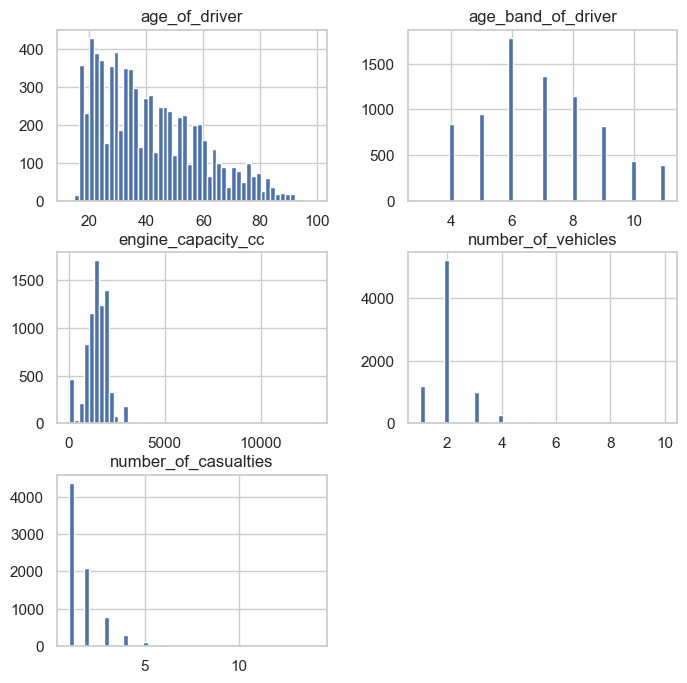

In [115]:
xtrain[["age_of_driver", "age_band_of_driver", "engine_capacity_cc", "number_of_vehicles", "number_of_casualties"]].hist(bins=50, figsize=(8,8))

After scaling

In [116]:
for col in ["age_of_driver", "age_band_of_driver", "engine_capacity_cc", "number_of_vehicles", "number_of_casualties"]:
    xtrain.loc[:, col] = np.log(xtrain.loc[:, col] + 1)
    xtest.loc[:, col] = np.log(xtest.loc[:, col] + 1)

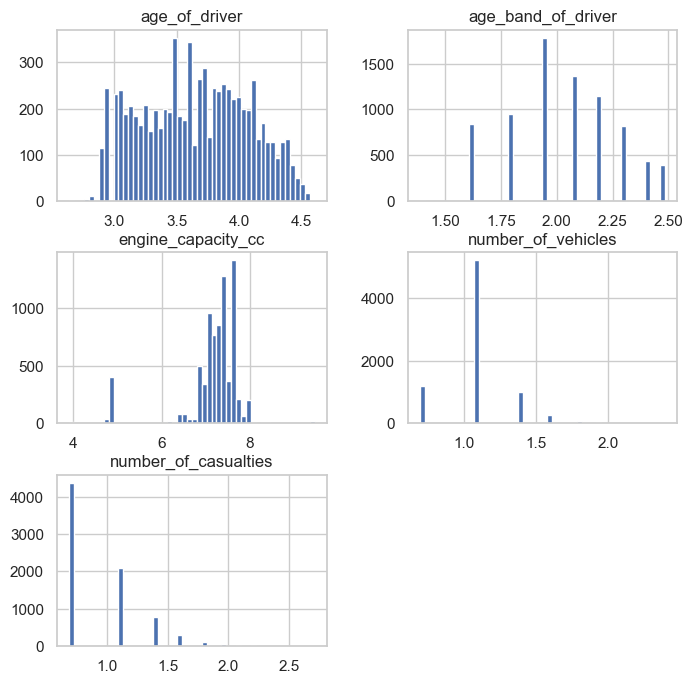

In [117]:
_ = xtrain[["age_of_driver", "age_band_of_driver", "engine_capacity_cc", "number_of_vehicles", "number_of_casualties"]].hist(bins=50, figsize=(8,8))

# OUTLIER DETECTION: ISOLATION FOREST

In [118]:
xtrain.shape, xtest.shape

((7748, 55), (1937, 55))

In [119]:
xtrain.drop(columns=['accident_reference'], inplace = True)
xtest.drop(columns=['accident_reference'], inplace = True)
xtrain.drop(columns=['generic_make_model'], inplace = True)
xtest.drop(columns=['generic_make_model'], inplace = True)

In [120]:
clf = IsolationForest(n_estimators=100, random_state=24, contamination=0.04).fit(xtrain)
yhat = clf.predict(xtrain)
yhat

array([1, 1, 1, ..., 1, 1, 1])

Mark the 4% of outliers to drop. 4% was decided arbitrarly

In [121]:
xtrain = xtrain[yhat != -1]
ytrain = ytrain[yhat != -1]
xtrain.shape

(7438, 53)

In [122]:
yhat = clf.predict(xtest)
xtest = xtest[yhat == 1]
ytest = ytest[yhat != -1]
xtest.shape

(1864, 53)

In [123]:
xtrain.shape[0]+xtest.shape[0]

9302

# SAVE THE DATA

Before saving the data we decided to drop number of behicles involved in an accident and number of casualties because they are not know in advance and can make the machine 'cheating' rather then learning

In [126]:
xtrain.drop(columns=['number_of_vehicles', 'number_of_casualties'], inplace = True)
xtest.drop(columns=['number_of_vehicles', 'number_of_casualties'], inplace = True)

In [127]:
trainset = xtrain.copy()
trainset['accident_severity'] = ytrain.values
testset = xtest.copy()
testset['accident_severity'] = ytest.values

In [ ]:
#trainset.to_csv("trainset_BD.csv", index=False)
#testset.to_csv("testset_BD.csv", index=False)